<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

## Introduction to Computational Social Science methods with Python

# Session 2: Data handling and visualization

**Data** has two components: content and structure. Plain text data is unstructured, but its content can also be represented in a structured way. Data representations reside in a continuum of structuration. The rectangular table (also called dataframe or spreadsheet) is the most frequent data format in the social sciences because data is structured. Hierarchical data formats like JSON and HTML are semi-structured, and text data is unstructured (<a href='#weidmann_2022'>Weidmann 2022</a><a id='#weidmann_2022'></a>, ch. 3). In the practice of Computational Social Science, everything revolves around data. The so-called research life cycle consists of the three steps of data collection, data processing, and data analysis. During this cycle, data changes its face: it is transformed from a raw state to a state in which it is ready for analysis. **Data processing** subsumes the steps in which this transformation takes place (Weidmann 2022, ch. 1).

**Data management** refers to the practices by which we stay in control of data as a resource. Data is best managed when the focus is on practical questions. Since data processing is the central step of the research life towards answering those questions, it is strategically advantageous to also focus data management on data processing. Computational data processing workflows are advantageous because they fully document all the many steps from data collection to data analysis, they are convenient (like your favorite spreadsheet software could never be), they are replicable (nowadays in high demand by scholarly journals), they can be scaled up (necessary for [big data](https://en.wikipedia.org/wiki/Big_data)), and they offer the needed flexibility in the face of semi-structured or unstructured data sources (Weidmann 2022, p.7–9).

The **R** language and environment for statistical computing and graphics is very popular in the social sciences, also because it provides the [Tidyverse](https://www.tidyverse.org/), a collection of mutually adapted packages for tabular data structures, their manipulation (e.g., merging, aggregating), and producing appealing graphics (Weidmann 2022, ch. 7). We argue that **Python** does not need to hide behind R in this regard. The [Pandas](https://pandas.pydata.org/) library for managing tables truly is a "fast, powerful, flexible and easy to use open source data analysis and manipulation tool" that, when combined with the [Seaborn](https://seaborn.pydata.org/) statistical data visualization library, leaves nothing to be desired.

Pandas can also be used in a way that mimics the functionality of **relational databases**. These are systems where the columns of a table are split into multiple tables such that all reduncancies are eliminated. Relational databases are often used in research when the data is either large in volume or rich in content because they ensure consistency and speed up data processing (Weidmann 2022, part 3). The public [TweetsKB](https://data.gesis.org/tweetskb/) corpus of annotated tweets (Fafalios *et al.* 2018) as well as its offspring, the [TweetsCOV19](https://data.gesis.org/tweetscov19/) corpus (Dimitrov *et al.* 2020), are examples where the data is explicitly modeled relationally and can serve as illustrations of meaningful data management.

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how you can manage your data, keep it tidy, and visualize it while keeping a focus on your research questions. In subsession **2.1**, we will have a deep look at the rectangular table. You will experience how you can use the Pandas library to handle tables and mimic a relational database in such a way that your data gets ready for analysis. You will see what it means that relational databases eliminate redundancy and ensure consistency. The TweetsCOV19 dataset will function as an example that will shine up repeatedly in this and subsequent sessions. In subsession **2.2**, we will introduce the NumPy and SciPy libraries. NumPy allows to work with n-dimensional tables called arrays which are typically needed in in data processing. SciPy enables you to efficiently process and analyze very large matrices (i.e., 2-dimensional numerical tables) with many zeros or missing values (which is often the case). Finally, in subsession **2.3**, you will learn how to use the Matplotlib and Seaborn libraries to explore data visually.
</div>

## 2.1. Managing data with Pandas

<img src='images/pandas.png' style='height: 100px; float: right; margin-left: 10px'>

[Pandas](https://pandas.pydata.org/) is Python's package for data management and processing using 2-dimensional tables. It allows you to work with any kind of observational or statistical data set, including matrices. Column entries can be heterogeneous (i.e., a single column can contain text, numericals, even lists). Pandas is also well-equipped to handle time series data, as we will see. We start with some illustrative toy examples before we enter the almost-big-data world using the TweetsCOV19 dataset and see how we can save our tables.

### 2.1.1. Toy examples

#### Data and structure

In subsections 3.2 to 3.4, Weidmann (2022) discusses data, data processing, and the benefit of relational databases using toy examples and the R language. Here, we adapt these examples to Python. Consider the following two pieces of data. Consider that data = content + structure. The two have (almost) the same content but different structure. `sdb` is unstructured, `tdb` is structured:

In [1]:
sdb = 'Switzerland is a country with 8.3 million inhabitants, and its capital is Bern. Another country is Austria; its capital is Vienna and the population is 8.7 million.'
sdb

'Switzerland is a country with 8.3 million inhabitants, and its capital is Bern. Another country is Austria; its capital is Vienna and the population is 8.7 million.'

In [2]:
import pandas as pd
pd.__version__

'1.4.4'

In [3]:
tdb = pd.DataFrame(data=[['Switzerland', 8.3, 'Bern'], ['Austria', 8.7, 'Vienna']], columns=['country', 'population', 'capital'])
tdb

,country,population,capital
0,Switzerland,8.3,Bern
1,Austria,8.7,Vienna


`tdb` is a Pandas table called a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). The columns of a DataFrame are called [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). A DataFrame contains labeled axes (rows and columns). Axis 0 (the rows) is called the **index**, and its labels consist of integers from $0$ to $n-1$ by default where $n$ is the number of rows:

In [4]:
tdb.index

RangeIndex(start=0, stop=2, step=1)

When no names are given, the **columns** (axis 1) are also labeled in such a way, but using text labels makes the table much more readable:

In [5]:
tdb.columns

Index(['country', 'population', 'capital'], dtype='object')

Similarly the index can be a list of text labels.

Rows, columns, or cells can be extracted by specifying their locations (labels). For example, to extract the capital of Austria:

In [6]:
tdb.loc[1, 'capital']

'Vienna'

To select all rows where the country is Switzerland:

In [7]:
tdb[tdb['country'] == 'Switzerland']

,country,population,capital
0,Switzerland,8.3,Bern


To add a new column:

In [8]:
tdb['area'] = [41, 83]
tdb

,country,population,capital,area
0,Switzerland,8.3,Bern,41
1,Austria,8.7,Vienna,83


The values in the <span style='font-family:Courier'>area</span> column are integers:

In [9]:
tdb['area'].dtype

dtype('int64')

To add a new row, we must first create a DataFrame containing the new row. Then we can [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)enate the two dataframes on the index axis:

In [10]:
new_row = ['Liechtenstein', 0.038 , 'Vaduz', 0.16]
tdb_new_row = pd.DataFrame(data=[new_row], columns=tdb.columns)
tdb = pd.concat(objs=[tdb, tdb_new_row], axis=0)
tdb

,country,population,capital,area
0,Switzerland,8.300,Bern,41.00
1,Austria,8.700,Vienna,83.00
0,Liechtenstein,0.038,Vaduz,0.16


Note that <span style='font-family:Courier'>area</span> is now a continuous variable:

In [11]:
tdb['area'].dtype

dtype('float64')

But also note that concatenation results in the old indexes being used. To reset the index and drop the old values:

In [12]:
tdb = tdb.reset_index(drop=True)
tdb

,country,population,capital,area
0,Switzerland,8.300,Bern,41.00
1,Austria,8.700,Vienna,83.00
2,Liechtenstein,0.038,Vaduz,0.16


To remove the <span style='font-family:Courier'>area</span> column we can `drop` it and put the result `inplace` of the original table:

In [13]:
tdb.drop(labels=['area'], axis=1, inplace=True)
tdb

,country,population,capital
0,Switzerland,8.300,Bern
1,Austria,8.700,Vienna
2,Liechtenstein,0.038,Vaduz


Alternatively, you could have used `del` which also works for whole dataframes:

In [14]:
# del tdb['area']

Rows can only be removed with the `drop()` method:

In [15]:
tdb.drop(labels=[2], axis=0, inplace=True)
tdb

,country,population,capital
0,Switzerland,8.3,Bern
1,Austria,8.7,Vienna


#### Wide vs. long structure

A rule in data management states that tables should grow long not wide. Consider this `bad_table` of two countries' population sizes in three years:

In [16]:
bad_table = pd.DataFrame(data=[['Switzerland', 4.7, 5.3, 6.2], ['Austria', 6.9, 7.1, 7.5]], columns=['country', 'pop1950', 'pop1960', 'pop1970'])
bad_table

,country,pop1950,pop1960,pop1970
0,Switzerland,4.7,5.3,6.2
1,Austria,6.9,7.1,7.5


Though appealing to the eye, this table is computationally bad as can be demonstrated by trying to compute the average population size over all countries and years. It is fairly easy to compute the mean for each year by selecting the corresponding columns...

In [17]:
bad_table[['pop1950', 'pop1960', 'pop1970']].mean(axis=0)

pop1950    5.80
pop1960    6.20
pop1970    6.85
dtype: float64

but computing the overall mean requires selecting columns and taking the mean of the year means:

In [18]:
bad_table[['pop1950', 'pop1960', 'pop1970']].mean().mean()

6.283333333333334

A `good_table` is long not wide:

In [19]:
good_table = pd.DataFrame(data=[['Switzerland', 1950, 4.7], ['Switzerland', 1960, 5.3], ['Switzerland', 1970, 6.2], ['Austria', 1950, 6.9], ['Austria', 1960, 7.1], ['Austria', 1970, 7.5]], columns=['country', 'year', 'population'])
good_table

,country,year,population
0,Switzerland,1950,4.7
1,Switzerland,1960,5.3
2,Switzerland,1970,6.2
3,Austria,1950,6.9
4,Austria,1960,7.1
5,Austria,1970,7.5


Computing the overall mean is a simple operation on one column...

In [20]:
good_table['population'].mean()

6.283333333333334

and the year means can be obtained via aggregation (using the [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method) without having to specify any year columns:

In [21]:
good_table.groupby('year').mean().reset_index()

,year,population
0,1950,5.80
1,1960,6.20
2,1970,6.85


#### Multiple tables

What does it mean that relational databases eliminate redundancies and ensure consistency? Consider a copy of the `good_table` with an additional column that contains a country's capital (copying makes sure that any changes made to `good_table` do not effect `good_table2`):

In [22]:
good_table2 = good_table.copy()
good_table2.loc[0:2, 'capital'] = 'Bern'
good_table2.loc[3:5, 'capital'] = 'Vienna'
good_table2

,country,year,population,capital
0,Switzerland,1950,4.7,Bern
1,Switzerland,1960,5.3,Bern
2,Switzerland,1970,6.2,Bern
3,Austria,1950,6.9,Vienna
4,Austria,1960,7.1,Vienna
5,Austria,1970,7.5,Vienna


Clearly, this table contains redundant information because country-capital pairs are always the same. But this data format potentially yields a consistency problem. If, for example, you want to refer to capital names not in English but in the respective national language you must replace each occurrence of <span style='font-family:Courier'>Vienna</span> by <span style='font-family:Courier'>Wien</span>. But if you miss a single occurrence your table becomes inconsistent. You can evade both problems if you split `good_table2` into two tables: one containing the population sizes...

In [23]:
populations = good_table2[['country', 'year', 'population']].copy()
populations

,country,year,population
0,Switzerland,1950,4.7
1,Switzerland,1960,5.3
2,Switzerland,1970,6.2
3,Austria,1950,6.9
4,Austria,1960,7.1
5,Austria,1970,7.5


and one containing the capitals:

In [24]:
capitals = good_table2[['country', 'capital']].drop_duplicates().reset_index(drop=True)
capitals

,country,capital
0,Switzerland,Bern
1,Austria,Vienna


This way you have eliminated all redundancies and you have ensured consistency because you need to replace <span style='font-family:Courier'>Vienna</span> by <span style='font-family:Courier'>Wien</span> in one place only.

Next, we will take Pandas and relational database thinking to the next level.

### 2.1.2. TweetsCOV19

[Twitter](https://en.wikipedia.org/wiki/Twitter) is a microblogging service that is very influential among politicians and journalists. Though stagnating over the past years, the number of monthly active users was at 238 million in the second quarter of 2022 (Wikipedia 2022). Since January 2013, researchers at [L3S](https://www.l3s.de/) and [GESIS](https://www.gesis.org/) have been collecting a 1% random sample of all Twitter posts (tweets), detecting sentiments, and extracting named entities, user mentions, hashtags, as well as URLs, and made those publicly available as the [TweetsKB](https://data.gesis.org/tweetskb/) corpus (Fafalios *et al.* 2018). By August 2022, the corpus had grown to about 3 billion tweets. In the following, we will store the content of a small fraction of those tweets, one month of the [TweertsCOV19](https://data.gesis.org/tweetscov19/) corpus (Dimitrov *et al.* 2020), in multiple Pandas dataframes that make reference to the TweetsKB data structure.

#### Ontologies in practice

|<img src='images/model.png' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 1**: Data structure used to build the TweetsKB corpus ([source](https://data.gesis.org/tweetskb/#Data-model))</em>|

The data structure depicted in ***figure 1*** used to build the TweetsKB corpus is relational and uses several standardized ontologies. **Relational** means that each piece of content belongs to a class, and classes have properties which can either describe a class attribute or link to another class. We will shortly see that classes are candidates for tables. Classes and properties are drawn from **ontologies** which are vocabularies for modeling data and, in our particular tweets case, online community data. These vacabularies are developed and maintained by the [Semantic Web](https://en.wikipedia.org/wiki/Semantic_Web) research community which aims at making internet data machine-readable.

|<img src='images/TweetsKB_model_example.jpg' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 2**: Example how a tweet is encoded using the data structure</em>|

***Figure 2*** is an example how a tweet is encoded using this abstract data structure. In other words, the figure depicts how the content of a tweet is modeled as machine-readable data. Starting with the central element, a **tweet** is modeled as belonging to the [Post](https://www.w3.org/Submission/sioc-spec/#term_Post) class which is defined as an "article or message that can be posted to a Forum" in the [SIOC](http://sioc-project.org/) ontology. A tweet has a [has_creator](https://www.w3.org/Submission/sioc-spec/#term_has_creator) property which links a tweet to a user. A **user** is modeled as belonging to the [User](https://www.w3.org/Submission/sioc-spec/#term_User) class (in figure 1, the class is called UserAccount) which is defined as a "User account in an online community site." The "tweet1" instance of Post as well as the "usr1" instance of User have [id](http://rdfs.org/sioc/spec/#term_id) properties which link to the actual [literal](https://www.w3.org/TR/rdf-schema/#ch_literal) values of the **tweet id** (<span style='font-family:Courier'>9565121266</span>) and (encrypted) **user name** (<span style='font-family:Courier'>2356912</span>) variables. Below, we will create separate Pandas tables for the Post and User classes. This is – just like in the above example of populations and capitals – how redundancy is eliminated.

Starting from such an understanding of separate tables for tweets and users, we can discuss to which one some of the other variables belong which come with the data. The **timestamp**, **number of retweets** (number of users that forward the tweet), and **number of favorites** (number of users that like the tweet) clearly are attributes of tweets. In the example of *figure 1*, "tweet1" is liked by $12$ users, a statistic that is modeled using the [InteractionCounter](https://schema.org/InteractionCounter) for the [LikeAction](https://schema.org/LikeAction) of the [Schema.org](https://schema.org/) vocabulary. The **number of followers** and **number of friends** (number of users a user follows) seem to be attributes of users at first glance. But since they are measured at the time of tweet creation, they are better also attributed to tweets. While these variables are delived by the Twitter API, the following variables have been obtained by the corpus creators by processing the tweet content. The sentiment or emotional content of a tweet is modeled by using the [Onyx](https://www.gsi.upm.es/ontologies/onyx/) ontology which is "designed to annotate and describe the emotions expressed by user-generated content". The [SentiStrength](http://sentistrength.wlv.ac.uk/) algorithm results in **positive sentiment** (1 means low and 5 means high) and **negative sentiment** (-1 means low and -5 means high) variables. Though the sentiment expresses the mind state of a user, it is expressed in language and is, hence, a tweet attribute.

The dataset producers have also annotated tweets by extracting four different kinds of entities from tweet texts: named entities (universally recognized semantic concepts), user **mentions** (words starting with <span style='font-family:Courier'>@</span>), **hashtags** (words starting with <span style='font-family:Courier'>#</span>), and **URLs** (addresses of web pages). Since URLs are often too detailed, we will also extract the **top level domains** (TLDs) from URLs. To identify **named entities**, the [FEL](https://github.com/yahoo/FEL) algorithm matches parts of the tweet **text** to Wikipedia pages as universally identifiable resources and provides a **confidence** score to what extent the match is trustworthy (0 means high and -3 means low confidence). In the example of *figure 2*, the text snippet <span style='font-family:Courier'>Federer</span> has been matched to the Wikipedia resource [Roger_Federer](https://de.wikipedia.org/wiki/Roger_Federer) with an average confidence of $-1.54$.

|<img src='images/TweetsCOV19_ext_erd.png' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 3**: Entity relationship diagram to organize Pandas tables</em>|

It is clear that named entities, mentions, hashtags, URLs, and TLDs cannot be tweet attributes as that would create an immense amount of redundancy. Hence, they each become tables. ***Figure 3*** shows the entity relationship diagram into which we will transform the tweets data. The diagram mirrors the TweetsKB data structure, and we will construct the tables shown in the figure by following the rules of [database normalization](https://en.wikipedia.org/wiki/Database_normalization). Entities are classes in the above sense and not to be confused with named entities. We will create **entity tables** for the seven entities discussed so far: `tweets`, `users`, `named_entities`, `mentions`, `hashtags`, `urls`, and `tlds`. Each table has a primary key (PK) which uniquely identifies the entity instances in a table. We will use the dataframe index as primary keys. Six of those tables have a column called 'tweets' which is the number of times the entity has been selected in a tweet.

In addition, we will create five **relationship tables** that put tweets into relationship to named entities, mentions, hashtags, URLs, and TLDs. Relationship tables are depicted using dashed lines in *figure 3*. They just contain entity identifiers (indices) that are now called foreign keys (FK). We will shortly see that relationship tables can be directly used in data analysis. One of the five tables is an exception: The `tweets_named_entities` table has two more columns – the text that was used to name the named entity and the confidence score – because these are true attributes of the relationship between tweets and named entities. Finally, users and tweets are linked in the tweets table via the 'user_idx' column because a tweet is created by one and only one user.

#### Structuring TweertsCOV19

We will be working with the May 2020 dump of the TweertsCOV19 corpus. Download this [file](https://zenodo.org/record/4593502/files/TweetsCOV19_052020.tsv.gz) and put it into the 'data' folder. The [description](https://data.gesis.org/tweetscov19/#Dataset) of the dataset says that each row contains variables of a tweet instance, there are twelve variables (columns), and variables are separated by a tab character ('\t'). In other words, the data is delivered as a table. Furthermore, the description says that sentiment scores, named entity metadata, etc. are concatenated, In other words, the delivered table is wide in selected columns. Our job will be to transform this table into the multiple tables of *figure 3*. Before reading the full data, it is a good idea to look at the first rows to check if the file contains column names and if there are any peculiarities. Using UTF-8 encoding is recommended since it allows for coding many different characters:

In [25]:
head = pd.read_csv(
    filepath_or_buffer = 'data/TweetsCOV19_052020.tsv.gz', 
    sep = '\t', 
    nrows = 5, 
    encoding = 'utf-8'
)
head

,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,Thu Apr 30 22:00:24 +0000 2020,29697,24040,0,0.1,null;,1 -1,null;.1,Opinion Next2blowafrica thoughts,null;.2
0,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;
1,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...
2,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,Thu Apr 30 22:04:52 +0000 2020,237,168,0,0,null;,1 -1,null;,null;,https://lockdownsceptics.org/2020/04/30/latest...
3,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,Thu Apr 30 22:05:18 +0000 2020,423,427,0,0,i hate u:I_Hate_U:-1.8786140035817729;quaranti...,1 -4,null;,null;,null;
4,1255982235662024704,491a98bbc105806cb67f46f5e3f3d888,Thu Apr 30 22:07:54 +0000 2020,52,46,0,0,god forbid:God_Forbid:-1.2640735877261988;covi...,2 -4,Danartman BishopStika,null;,https://www.dailymail.co.uk/health/article-826...


In [26]:
head.shape

(5, 12)

Knowing that the file does not contain column names and that the separator indeed creates twelve columns, we can read the whole file.

<div class='alert alert-block alert-danger'>
<b>Caution</b>

The file we are about to load is almost 200 MB large in compressed format. When loaded into memory as a dataframe it consumes almost 1 GB. Since we are about to create many new tables from it which all require significant amounts of memory you can quickly reach the limits of the machine you are working on. In fact, if we work with the whole file and run the notebook all until the end, it will consume 4.2 GB. This is too much if, for example, you are executing this notebook on mybinder.org which gives you 2 GB of memory.
</div>

To reduce the memory load, take a sample from the already-sampled file. Setting the `seed()` of the random library will create results that are exactly reproducible. `p` is the sample fraction to load. It is set to 25% to use less than 2 GB of memory. Increase it if you have more memory:

In [27]:
import random

In [28]:
random.seed(42)
p = .25

In [29]:
tweets = pd.read_csv(
    filepath_or_buffer = 'data/TweetsCOV19_052020.tsv.gz', 
    sep = '\t', 
    header = None, 
    skiprows = lambda i: i > 0 and random.random() > p, 
    quoting = 3, 
    encoding = 'utf-8'
)

<div class='alert alert-block alert-danger'>
<b>Caution</b>

Setting the `quoting` parameter of the [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to the value `3` means that no quoting symbols (e.g., quotation marks) are used to enclose the content of cells in columns. This allows that the respective symbol can be a cell content. In the TweetsCOV19 dataset, some hashtags actually contain quotation marks. Not setting the parameter to `3` would result in a wrong reading of the file.
</div>

From the [description](https://data.gesis.org/tweetscov19/#Dataset) we draw the labels for the column names:

In [30]:
tweets.columns = ['tweet_id', 'user', 'timestamp', 'followers', 'friends', 'retweets', 'favorites', 'named_entities', 'sentiments', 'mentions', 'hashtags', 'urls']

In [31]:
tweets

,tweet_id,user,timestamp,followers,friends,retweets,favorites,named_entities,sentiments,mentions,hashtags,urls
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,Thu Apr 30 22:00:24 +0000 2020,29697,24040,0,0,null;,1 -1,null;,Opinion Next2blowafrica thoughts,null;
1,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...
2,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,Thu Apr 30 22:05:18 +0000 2020,423,427,0,0,i hate u:I_Hate_U:-1.8786140035817729;quaranti...,1 -4,null;,null;,null;
3,1255985637246865410,d6fff22276aad81631affdecb83a8d9a,Thu Apr 30 22:21:25 +0000 2020,101,127,0,0,stealth:Stealth_game:-2.646174787470186;,1 -3,null;,null;,http://www.safetyhealthnews.com/covid-prompted...
4,1255985760790069251,c8f0b58eb5105e2318e15ff17b9e4250,Thu Apr 30 22:21:55 +0000 2020,722,572,4,33,fred guttenberg:Fred_Guttenberg:-1.35898888441...,1 -1,fred_guttenberg GovWhitmer,null;,null;
...,...,...,...,...,...,...,...,...,...,...,...,...
480700,1267178565298241538,29f87bedcbae099aff8588db39666352,Sun May 31 19:38:07 +0000 2020,833,687,0,0,missouri:Missouri:-2.144181677743898;florida:F...,2 -1,null;,null;,null;
480701,1267189109774266369,f67bd1f0c41cb218ad9e143fc8dda6a8,Sun May 31 20:20:01 +0000 2020,2755,3901,0,0,covid 19:Coronavirus_disease_2019:-1.535776454...,2 -2,standardnews,null;,null;
480702,1267189273364578304,a9d5231b8f8ca0bd86884d596bc572dd,Sun May 31 20:20:40 +0000 2020,1610,777,0,0,eat:East_Africa_Time:-2.4654413209752946;,2 -1,jotbro77,null;,null;
480703,1267196986660458499,8e93b969fa0082b6fcba6acc2c9e3e8c,Sun May 31 20:51:19 +0000 2020,52,152,0,0,skynews:Sky_News:-2.4443176685121135;,2 -1,SkyNews,null;,null;


There are 480 thousand tweets (1.9 million for the full sample). Look at the 'named_entities' column to see how multiple annotations are stored in single cells.

#### Creating the `users` table

Besides the 'user' name, the `users` table should also contain the number of tweets the user has created as well as the maximum numbers of followers and friends. Aggregate the data using the `groupby()` function with the `size()` method to count the number of rows (number of tweets)...

In [32]:
users = tweets.groupby(by='user').size().reset_index(name='tweets')
users.head()

,user,tweets
0,000016e54a4dc155432ebad949c2546e,1
1,000037774001c1016af0b621b1299657,1
2,000058bdeaa281c0e1648193b163fa4f,1
3,000088cdedbf61ede06e027bdc0710d3,1
4,0000a7994a8534f67944738260474cd7,1


and the with the `.max()` method to get the maximum numbers of followers and friends:

In [33]:
users_ff = tweets.groupby(by='user')[['followers', 'friends']].max().reset_index()
users_ff.columns = ['user', 'followers_max', 'friends_max']
users_ff.head()

,user,followers_max,friends_max
0,000016e54a4dc155432ebad949c2546e,6853,992
1,000037774001c1016af0b621b1299657,7,50
2,000058bdeaa281c0e1648193b163fa4f,3823,167
3,000088cdedbf61ede06e027bdc0710d3,999,2570
4,0000a7994a8534f67944738260474cd7,225,851


Since these dataframes are both ordered alphabetically and have the same length, we can simply add the two columns from `users_ff` to the then complete `users` table:

In [34]:
users[['followers_max', 'friends_max']] = users_ff[['followers_max', 'friends_max']]

Sort the dataframe descendingly by the number of tweets, maximum number of followers, and maximum number of friends (in that order):

In [35]:
users = users.sort_values(by=['tweets', 'followers_max', 'friends_max'], ascending=False).reset_index(drop=True)

Finally, reorder the columns:

In [36]:
users = users[['user', 'tweets', 'followers_max', 'friends_max']]

The index will function as a unique user identifier:

In [37]:
users

,user,tweets,followers_max,friends_max
0,7513717dba8b208fe06799dcc54e59e2,464,21985195,1116
1,2435a45b85628172c5a47122144a7c67,357,48295579,1109
2,4ff35e52034daec0251f7b3370969a1a,353,4149063,0
3,090264f1888056a96f32ccb7d91ba4e7,321,3788655,266
4,bf4571b94429c5b18e0a219c197a56a4,278,6145493,28
...,...,...,...,...
353369,ff0b29d605ef1707c95bc7e8c8fb6694,1,0,0
353370,ff6a57fc7c7cd18cc2a293b79493756a,1,0,0
353371,ffc5ea3bff62a184be9cdcd399ec27dd,1,0,0
353372,ffeb62654f94d36a4075ca408ecf0089,1,0,0


Note that 'user' names are encrypted for privacy reasons in the original dataset. There are 1.1 million distinct users, and the most active one has created 1,989 tweets. Indeed, it is not an error that some users have tens of millions of followers [and more](https://en.wikipedia.org/wiki/List_of_most-followed_Twitter_accounts). An interesting observation is that the most active users also have many followers.

The index values of this table are unique identifiers for the users in the dataset (the primary keys). The effect of sorting is that the most active users have small index values which aids computational purposes, as you will see.

To not waste memory, it is good practice to delete dataframes we do not need anymore:

In [38]:
del users_ff

#### Creating the `tweets` table

We will proceed by refining the existing `tweets` table. Sorting tweets by date and time is straightforward. For handling such data, Pandas provides the 'datetime' data type. It is perfectly suited for handling time series data as it allows for manipulating dates and times in many ways. For now, we will simply transform the 'timestamp' values from 'string' [`to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html). Set the `format` of the original string to spare Pandas figuring it out itself (and save time):

In [39]:
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'], format='%a %b %d %X %z %Y')

Knowing that the timezone is Coordinated Universal Time (UTC), remove it:

In [40]:
print(tweets['timestamp'].dt.tz)
tweets['timestamp'] = tweets['timestamp'].dt.tz_localize(tz=None)

UTC


Then remove tweets from April 2020 (since they are not complete) and sort the dataframe:

In [41]:
tweets = tweets[tweets['timestamp'] >= '2020-05-01']
tweets = tweets.sort_values(by=['timestamp']).reset_index(drop=True)

After sorting the index is stable and acts as a unique tweet identifier.

The first change the table needs is to replace the 'user' name by the 'user_idx' index from the `users` table. Since we will repeat this operation for other tables, we define an `add_index()` function. Following best Python practice, what it does is described in the function itself:

In [42]:
def add_index(source, target, entity):
    '''
    Inserts the index of a source dataframe into a target dataframe as a column.
    
    Parameters:
        source : Pandas DataFrame
            Dataframe whose index is to be inserted.
        target : Pandas DataFrame
            Dataframe into which the index is inserted.
        entity : String
            Name of the entity that is identified by the index. Will be given an '_idx' suffix and then inserted into the target dataframe.
    
    Returns:
        The target dataframe with the inserted column.
    '''
    _ = source.copy()
    _[entity + '_idx'] = _.index
    df = pd.merge(left=target, right=_[[entity + '_idx', entity]], on=entity)
    del df[entity]
    return df

In [43]:
tweets = add_index(source=users, target=tweets, entity='user')

After reordering the columns, the 'user_idx' column is at the right position:

In [44]:
tweets = tweets[['tweet_id', 'user_idx', 'timestamp', 'followers', 'friends', 'retweets', 'favorites', 'named_entities', 'sentiments', 'mentions', 'hashtags', 'urls']]
tweets.head()

,tweet_id,user_idx,timestamp,followers,friends,retweets,favorites,named_entities,sentiments,mentions,hashtags,urls
0,1256010446827433984,80519,2020-05-01 00:00:00,7449,636,3,2,null;,2 -1,null;,domesticviolence,null;
1,1256010446559039488,51478,2020-05-01 00:00:00,85194,1496,0,0,null;,2 -1,null;,null;,https://www.themarysue.com/yes-i-would-use-thi...
2,1256010445908881410,4418,2020-05-01 00:00:00,88212,635,13,43,sesame street:Sesame_Street:-1.0571497380025907;,2 -1,null;,null;,https://thehardtimes.net/culture/sesame-street...
3,1257097608738140161,4418,2020-05-04 00:00:00,88395,635,2,8,cdc:Centers_for_Disease_Control_and_Prevention...,1 -1,null;,null;,https://thehardtimes.net/culture/bald-guy-push...
4,1259256865126600705,4418,2020-05-09 23:00:07,88644,634,65,201,doomsday preppers:Doomsday_Preppers:-1.5662125...,1 -2,null;,null;,https://thehardtimes.net/music/doomsday-preppe...


#### Creating the `named_entities` and `tweets_named_entities` tables

Next, we process the entities. In general, we proceed by, first, extracting relationship tables from the `tweets` table and, second, deriving the entity tables from the relationship tables. We start with the most complicated case of **named entities**. The 'named_entities' column of the `tweets` table contains ';'-separated 3-tuples each of which contains ':'-separated values for 'text', 'named_entity', and 'confidence'. In the process of normalization, the first step is to transform cell content into lists of 3-tuples. Again, we define a custom function that we can apply later on:

In [45]:
def to_list(cell, pat):
    '''
    Function to be applied to individual cells of a dataframe column. Transforms concatenated cell content into a list.
    
    Parameters:
        pat : String
            Pattern that separates the cell values.
    
    Returns:
        The cell will automatically be overwritten by a potentially empty list.
    '''
    if cell == 'null;' or type(cell) == float:
        cell = ['']
    else:
        cell = cell.split(pat)
    return cell

In [46]:
tweets['named_entities'] = tweets['named_entities'].apply(to_list, pat=';')

An example cell with a list of multiple 3-tuples now looks like this:

In [47]:
tweets['named_entities'][5]

['']

Next we create the `tweets_named_entities` relationship table. The reason for having created a list of 3-tuples is that a wide table – the subtable with just the 'named_entities' column – can be easily and quickly transformed into a long table using the `explode()` method:

In [48]:
tweets_named_entities = tweets[['named_entities']].explode(column='named_entities')
del tweets['named_entities']
tweets_named_entities.head()

,named_entities
0,
1,
2,sesame street:Sesame_Street:-1.0571497380025907
2,
3,cdc:Centers_for_Disease_Control_and_Prevention...


Remove rows without 3-tuples (concatenation artifacts) and split the 3-tuples into three columns:

In [49]:
tweets_named_entities = tweets_named_entities[tweets_named_entities['named_entities'] != '']
tweets_named_entities = tweets_named_entities['named_entities'].str.split(pat=':', expand=True)
tweets_named_entities.head()

,0,1,2
2,sesame street,Sesame_Street,-1.0571497380025907
3,cdc,Centers_for_Disease_Control_and_Prevention,-2.5639323763517483
4,doomsday preppers,Doomsday_Preppers,-1.5662125698192169
4,ska,Ska,-1.7401045224490466
7,hydroxychloroquine,Hydroxychloroquine,-1.083599029221355


At this point, the index consists of the unique tweet identifiers because we used `explode()` on a `tweets` subtable.

<div class='alert alert-block alert-info'>
<b>Insight: Data quality</b>

Part of what we call "getting a feeling for your data" is to actually look at it. For example, here is the right stage in the data processing pipeline to check how well the named-entity-recognition algorithm worked because the `tweets_named_entities` still contains the 'text' from which a named entity was recognized as well as the name of the 'named_entity'. Pandas is actually not the best tool to scan data as it only displays up to 50 rows at a time. You can cycle through your columns using `loc[]`, but it is more convenient to use a spreadsheet editor for the task. Therefore, below we export the distinct rows of the `tweets_named_entities` table to an Excel file. The first column is the tweet index, and you can look up the 'tweet_id' via `tweets.loc[<tweet index without angle brackets>, :]`. You can read the actual tweet of any user (*e.g.*, with the 'tweet id' $1262933787131904001$) by visiting https://twitter.com/anyuser/status/1262933787131904001.

Going through the rows you will notice that the text snippet <span style='font-family:Courier'>democrat</span> is matched to the [Democratic_Party_(United_States)](https://en.wikipedia.org/wiki/Democratic_Party_(United_States)) named entity with a confidence of -1.81. Even though the matching is mostly right in our particular context, the algorithm will also mismatch a lot of discourse about democracy itself. The problem also exists the other way around. The text <span style='font-family:Courier'>dems</span> which is frequently used to name the Democratic Party of the US is matched to [Defensively_equipped_merchant_ship](https://en.wikipedia.org/wiki/Defensively_equipped_merchant_ship) with a slightly weaker confidence of -2.03. The idea is to use this score to filter out bad matchings. However, setting the filter to -2.00 would result in missing the correct matching of <span style='font-family:Courier'>us democratic party</span> which has a score of -2.06. As you go through the spreadsheet you will notive more mistakes. All this points to the general problem of fully automated data processing. The quality of named entity recognition could be improved by using context-sensitive language models which will be introduced in session 9.
</div>

In [50]:
tweets_named_entities.drop_duplicates().to_excel(
    excel_writer = 'results/tweets_named_entities_dropped_duplicates.xlsx', 
    engine = 'xlsxwriter', 
    encoding = 'utf-8'
)

Continuing with creating `tweets_named_entities`, if we now reset the index without dropping the old one, the tweet index values will be added as the first column:

In [51]:
tweets_named_entities = tweets_named_entities.reset_index(drop=False)
tweets_named_entities.columns = ['tweet_idx', 'text', 'named_entity', 'confidence']
tweets_named_entities.head()

,tweet_idx,text,named_entity,confidence
0,2,sesame street,Sesame_Street,-1.0571497380025907
1,3,cdc,Centers_for_Disease_Control_and_Prevention,-2.5639323763517483
2,4,doomsday preppers,Doomsday_Preppers,-1.5662125698192169
3,4,ska,Ska,-1.7401045224490466
4,7,hydroxychloroquine,Hydroxychloroquine,-1.083599029221355


Drop duplicate relationships because we are not interested in multiple occurrences of a named entity in one tweet:

In [52]:
tweets_named_entities = tweets_named_entities.drop_duplicates().reset_index(drop=True)

The `named_entities` entity table is created from the `tweets_named_entities` relationship table, again using a dedicated function:

In [53]:
def create_entity_table(relationship_table, entity):
    '''
    Creates an entity table from a relationship table via aggregation.
    
    Parameters:
        relationship_table : Pandas DataFrame
            Dataframe that contains tweet entity relationships.
        entity : String
            Name of the entity column in the relationship table that contains the entities.
    
    Returns:
        An entity table sorted descendingly by an additional 'tweets' column giving the number of tweets that selected an entity.
    '''
    df = relationship_table.groupby(entity).size().reset_index(name='tweets')
    df = df.sort_values(by=['tweets', entity], ascending=[False, True]).reset_index(drop=True)
    return df

In [54]:
named_entities = create_entity_table(relationship_table=tweets_named_entities, entity='named_entity')
named_entities.head()

,named_entity,tweets
0,Coronavirus_disease_2019,34212
1,Quarantine,17190
2,China,12892
3,Social_distancing,9636
4,Twitter,8905


Given this entity table, add its index to the corresponding `tweets_named_entities` relationship table, reorder the columns to obtain the desired design, and change the data type of the 'confidence' scores from string to a rounded float:

In [55]:
tweets_named_entities = add_index(source=named_entities, target=tweets_named_entities, entity='named_entity')
tweets_named_entities = tweets_named_entities[['tweet_idx', 'named_entity_idx', 'text', 'confidence']]
tweets_named_entities['confidence'] = tweets_named_entities['confidence'].astype(float).round(4)
tweets_named_entities.head()

,tweet_idx,named_entity_idx,text,confidence
0,2,6611,sesame street,-1.0571
1,3890,6611,sesame street,-1.0571
2,77675,6611,sesame street,-1.0571
3,207706,6611,sesame street,-1.0571
4,216831,6611,sesame street,-1.0571


#### Creating the other entity tables

The data of the other entities (mentions, hashtags, URLs, and TLDs) is easier to normalize because the relationship tables only contain foreign keys. Without having to process metadata from named entity recognition, we can create the relationship tables via a general function:

In [56]:
def create_relationship_table(entity, to_lower_case, drop_duplicates=True, source=tweets):
    '''
    Creates a relationship table for a given entity from the `tweets` table.
    
    Parameters:
        source : Pandas DataFrame, default `tweets`
            Table that contains the entity column.
        entity : String
            Name of the entity column in the source table that contains the entities. The column must contain an object data type list of entity names.
        to_lower_case : Boolean
            Whether entity names should be reduced to lower case.
        drop_duplicates : Boolean, default True
            Whether duplicate relationships should be removed.
    
    Returns:
        A relationship table linking tweet indices to entity names.
    '''
    df = source[[entity + 's']].explode(column=entity + 's')
    df = df[df[entity + 's'] != '']
    df = df.reset_index()
    df.columns = ['tweet_idx', entity]
    if to_lower_case == True:
        df[entity] = df[entity].str.lower()
    if drop_duplicates == True:
        df = df.drop_duplicates().reset_index(drop=True)
    return df

The processing pipeline is the same for all three entities:

1. Transform the entity column in the `tweets` table to a list
2. Create the relationship table from the entity column in the `tweets` table
3. Delete the entity column in the `tweets` table
4. Create the entity table from the relationship table
5. Add the entity index to the relationship table

In the case of **mentions**, in step 2, we must transform all capital (upper case) characters to lower case. This is because user names on Twitter are not case-sensitive. In other words, when a user named "realDonaldTrump" already exists, no new user will be allowed with the name "realdonaldtrump". Since user mentions are extracted as words starting with @ but tweet creators often use upper and lower cases as they wish, not transforming upper to lower case would result in the same mentioned user getting more than a single unique identifier.

In [57]:
tweets['mentions'] = tweets['mentions'].apply(to_list, pat=' ') # Step 1
tweets_mentions = create_relationship_table(entity='mention', to_lower_case=True) # Step 2
del tweets['mentions'] # Step 3
mentions = create_entity_table(relationship_table=tweets_mentions, entity='mention') # Step 4
tweets_mentions = add_index(source=mentions, target=tweets_mentions, entity='mention') # Step 5

In [58]:
mentions.head()

,mention,tweets
0,realdonaldtrump,9396
1,pmoindia,1650
2,narendramodi,1571
3,jaketapper,1493
4,youtube,1383


Donald Trump is the most mentioned user by far, followed by the prime minister of india Narendra Modi both with his official and private account.

In the case of **hashtags**, do the same transformation from upper to lower case to prevent synonymous hashtags getting different indices:

In [59]:
tweets['hashtags'] = tweets['hashtags'].apply(to_list, pat=' ') # Step 1
tweets_hashtags = create_relationship_table(entity='hashtag', to_lower_case=True) # Step 2
del tweets['hashtags'] # Step 3
hashtags = create_entity_table(relationship_table=tweets_hashtags, entity='hashtag') # Step 4
tweets_hashtags = add_index(source=hashtags, target=tweets_hashtags, entity='hashtag') # Step 5

In [60]:
hashtags.head()

,hashtag,tweets
0,covid19,21447
1,coronavirus,9986
2,covid_19,3157
3,lockdown,2951
4,stayhome,2793


**URLs** are case-sensitive. Hence, set `to_lower_case=False` in step 2. To create the tables related to **TLDs**, postpone step 5:

In [61]:
tweets['urls'] = tweets['urls'].apply(to_list, pat=':-:') # Step 1
tweets_urls = create_relationship_table(entity='url', to_lower_case=False) # Step 2
del tweets['urls'] # Step 3
urls = create_entity_table(relationship_table=tweets_urls, entity='url') # Step 4

At this point, `tweets_urls` has all the information to create the TLD-related tables. Create the ``tweets_tlds`` as a copy of `tweets_urls` and extract the TLDs (pseudo step 2):

In [62]:
tweets_tlds = tweets_urls.copy()
tweets_tlds['tld'] = tweets_tlds['url'].str[8:].str.split(pat='/').str[0]

Now, finish step 5 for URLs...

In [63]:
tweets_urls = add_index(source=urls, target=tweets_urls, entity='url') # Step 5

and steps 4 and 5 for TLDs (step 3 is not necessary since no such column ever existed):

In [64]:
tlds = create_entity_table(relationship_table=tweets_tlds, entity='tld') # Step 4
tweets_tlds = add_index(source=tlds, target=tweets_tlds, entity='tld') # Step 5

In [65]:
urls.head()

,url,tweets
0,https://www.twittascope.com/?sign=5,136
1,https://api.whatsapp.com/send?phone=9190393567...,82
2,https://redcross.give.asia/campaign/essentials...,76
3,https://www.twittascope.com/?sign=7,69
4,http://rebrand.ly/work-2020,62


In [66]:
tlds.head()

,tld,tweets
0,twitter.com,8930
1,www.youtube.com,6529
2,www.instagram.com,3020
3,www.theguardian.com,2206
4,www.nytimes.com,1767


As expected, the detail of URLs hides which TLDs are most popular.

#### Creating the `sentiments` and `tweets_sentiments` tables

It is worth discussing whether or not it is necessary to store the three sentiment scores in a relationship table and the sentiment category in yet another table. It would also be possible to just have three columns in the `tweets` table. However, as we will see in the next subsection, it is beneficial to normalize our data all the way through. Creating those tables is also quite revealing: It shows how easily **wide subtables** can be **made long** when the number of columns is fixed. For comparison, the number of named entities, mentions, etc. per tweet is not fixed. That means, we could not transform the data into a fixed number of columns. But now we can (we have exactly three sentiment categories), and this allows us to dramatically reduce the number of data processing steps. Instead of transforming the concatenated positive and negative sentiment scores into a list (step 1) and appending an average score, we split the concatenated sentiment scores into two columns and write the average score in a third column:

In [67]:
tweets_sentiments = tweets['sentiments'].str.split(pat=' ', expand=True)
tweets_sentiments[0] = tweets_sentiments[0].astype('int')
tweets_sentiments[1] = tweets_sentiments[1].astype('int')
tweets_sentiments[2] = tweets_sentiments[[0, 1]].mean(axis=1)
tweets_sentiments.head()

,0,1,2
0,2,-1,0.5
1,2,-1,0.5
2,2,-1,0.5
3,1,-1,0.0
4,1,-2,-0.5


Instead of using `explode()` on a list (step 2), we use the beautiful `melt()` function which makes a wide (sub)table long ([`ignore_index=False`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) keeps the tweet index as a column). With the few steps in the following cell, we have already completed steps 2, 3, and 5 from the pipeline:

In [68]:
tweets_sentiments = pd.melt(tweets_sentiments, ignore_index=False).reset_index()
tweets_sentiments.columns = ['tweet_idx', 'sentiment_idx', 'score']
del tweets['sentiments']
tweets_sentiments.head()

,tweet_idx,sentiment_idx,score
0,0,0,2.0
1,1,0,2.0
2,2,0,2.0
3,3,0,1.0
4,4,0,1.0


The only thing left to do is to create the `sentiments` table which contains the labels for the 'sentiment_idx' in `tweets_sentiments`. We have to make this manually as we have not introduced these labels yet:

In [69]:
sentiments = pd.DataFrame(data=['positive', 'negative', 'average'], columns=['sentiment'])
sentiments

,sentiment
0,positive
1,negative
2,average


### 2.1.3. Saving the tables to file(s)

#### Multiple TSV files

Now that we have a set of linked tables, how do we store them? A simple way is to save each table to a file with tab-separated values (TSV) using [`to_csv(sep='\t')`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) (the following line just adds the first five rows of the table; to add all rows remove `.head()`; other tables are saved accordingly):

In [70]:
tweets.head().to_csv(path_or_buf='results/TweetsCOV19_tables/tweets.tsv', sep='\t', index=False, encoding='utf-8')
#users.head().to_csv(path_or_buf='results/TweetsCOV19_tables/users.tsv', sep='\t', index=False, encoding='utf-8')
#tweets_named_entities.head().to_csv(path_or_buf='results/TweetsCOV19_tables/tweets_named_entities.tsv', sep='\t', index=False, encoding='utf-8')
#tweets_mentions.head().to_csv(path_or_buf='results/TweetsCOV19_tables/tweets_mentions.tsv', sep='\t', index=False, encoding='utf-8')
#tweets_hashtags.head().to_csv(path_or_buf='results/TweetsCOV19_tables/tweets_hashtags.tsv', sep='\t', index=False, encoding='utf-8')
#tweets_urls.head().to_csv(path_or_buf='results/TweetsCOV19_tables/tweets_urls.tsv', sep='\t', index=False, encoding='utf-8')
#tweets_tlds.head().to_csv(path_or_buf='results/TweetsCOV19_tables/tweets_tlds.tsv', sep='\t', index=False, encoding='utf-8')
#named_entities.head().to_csv(path_or_buf='results/TweetsCOV19_tables/named_entities.tsv', sep='\t', index=False, encoding='utf-8')
#mentions.head().to_csv(path_or_buf='results/TweetsCOV19_tables/mentions.tsv', sep='\t', index=False, encoding='utf-8')
#hashtags.head().to_csv(path_or_buf='results/TweetsCOV19_tables/hashtags.tsv', sep='\t', index=False, encoding='utf-8')
#urls.head().to_csv(path_or_buf='results/TweetsCOV19_tables/urls.tsv', sep='\t', index=False, encoding='utf-8')
#tlds.head().to_csv(path_or_buf='results/TweetsCOV19_tables/tlds.tsv', sep='\t', index=False, encoding='utf-8')

To read:

In [71]:
pd.read_csv(filepath_or_buffer='results/TweetsCOV19_tables/tweets.tsv', sep='\t', encoding='utf-8')

,tweet_id,user_idx,timestamp,followers,friends,retweets,favorites
0,1256010446827433984,80519,2020-05-01 00:00:00,7449,636,3,2
1,1256010446559039488,51478,2020-05-01 00:00:00,85194,1496,0,0
2,1256010445908881410,4418,2020-05-01 00:00:00,88212,635,13,43
3,1257097608738140161,4418,2020-05-04 00:00:00,88395,635,2,8
4,1259256865126600705,4418,2020-05-09 23:00:07,88644,634,65,201


#### SQL

One benefit of a relational database is that it can be stored in one file. Hence, another possibility is to take the next step on the relational database path and store all tables in an SQL database. [SQLAlchemy](https://www.sqlalchemy.org/) has emerged as the standard Python library for working with databases in SQL-like ways. To store the twelve tables from *figure 3*, all you need to do before exporting the tables is to create a so-called "engine" that manages connections through which you create, modify, and query the database. In this case, we create an SQLite database (other SQL dialects are possible):

In [72]:
import sqlalchemy
sqlalchemy.__version__

'1.4.39'

In [73]:
engine = sqlalchemy.create_engine(url='sqlite:///results/TweetsCOV19.sql')

Use the [`to_sql()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html) method, configured to use the engine just created, to add the tables to the database (the following lines just add the first five rows of each table; to add all rows remove `.head()`; a table is replaced if it already exists):

In [74]:
tweets.head().to_sql(name='tweets', con=engine, if_exists='replace', index=False)
users.head().to_sql(name='users', con=engine, if_exists='replace', index=False)
tweets_named_entities.head().to_sql(name='tweets_named_entities', con=engine, if_exists='replace', index=False)
tweets_mentions.head().to_sql(name='tweets_mentions', con=engine, if_exists='replace', index=False)
tweets_hashtags.head().to_sql(name='tweets_hashtags', con=engine, if_exists='replace', index=False)
tweets_urls.head().to_sql(name='tweets_urls', con=engine, if_exists='replace', index=False)
tweets_tlds.head().to_sql(name='tweets_tlds', con=engine, if_exists='replace', index=False)
named_entities.head().to_sql(name='named_entities', con=engine, if_exists='replace', index=False)
mentions.head().to_sql(name='mentions', con=engine, if_exists='replace', index=False)
hashtags.head().to_sql(name='hashtags', con=engine, if_exists='replace', index=False)
urls.head().to_sql(name='urls', con=engine, if_exists='replace', index=False)
tlds.head().to_sql(name='tlds', con=engine, if_exists='replace', index=False)

5

To read a dataframe from the database also use the engine, but now in the [`read_sql()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) method:

In [75]:
pd.read_sql(sql='tweets', con=engine).head()

,tweet_id,user_idx,timestamp,followers,friends,retweets,favorites
0,1256010446827433984,80519,2020-05-01 00:00:00,7449,636,3,2
1,1256010446559039488,51478,2020-05-01 00:00:00,85194,1496,0,0
2,1256010445908881410,4418,2020-05-01 00:00:00,88212,635,13,43
3,1257097608738140161,4418,2020-05-04 00:00:00,88395,635,2,8
4,1259256865126600705,4418,2020-05-09 23:00:07,88644,634,65,201


#### Excel

It is also possible to store all tables as sheets in an Excel file. However, the limit is one million rows and columns per sheet, so Excel is not on option for the full dataset. But this is how the tables can be exported in principle:

In [76]:
with pd.ExcelWriter(path='results/TweetsCOV19.xlsx', engine='xlsxwriter') as writer:
    tweets.head().to_excel(writer, sheet_name='tweets')
    users.head().to_excel(writer, sheet_name='users')
    tweets_named_entities.head().to_excel(writer, sheet_name='tweets_named_entities')
    tweets_mentions.head().to_excel(writer, sheet_name='tweets_mentions')
    tweets_hashtags.head().to_excel(writer, sheet_name='tweets_hashtags')
    tweets_urls.head().to_excel(writer, sheet_name='tweets_urls')
    tweets_tlds.head().to_excel(writer, sheet_name='tweets_tlds')
    named_entities.head().to_excel(writer, sheet_name='named_entities')
    mentions.head().to_excel(writer, sheet_name='mentions')
    hashtags.head().to_excel(writer, sheet_name='hashtags')
    urls.head().to_excel(writer, sheet_name='urls')
    tlds.head().to_excel(writer, sheet_name='tlds')

To read a sheet from that file:

In [77]:
pd.read_excel(io= 'results/TweetsCOV19.xlsx', sheet_name='tweets', index_col=0)

,tweet_id,user_idx,timestamp,followers,friends,retweets,favorites
0,1256010446827433984,80519,2020-05-01 00:00:00,7449,636,3,2
1,1256010446559038976,51478,2020-05-01 00:00:00,85194,1496,0,0
2,1256010445908880896,4418,2020-05-01 00:00:00,88212,635,13,43
3,1257097608738139904,4418,2020-05-04 00:00:00,88395,635,2,8
4,1259256865126600960,4418,2020-05-09 23:00:07,88644,634,65,201


## 2.2. Handling data with Pandas, NumPy, and SciPy

In the previous subsection, you have learned how to create and save multiple tables from the raw TweetsCOV19 table that, taken together, mimic a relational database. In practice, particularly if your data is not as rich as this dataset, it may not be necessary to do that. However, even if you can live with some amount of redundancy, it certainly is a way to keep your data tidy and consistent. Having the TweetsCOV19 data in the relational database structure, we will next query it to obtain some first data descriptions. At some point when working with the data even Pandas will reach its limits. It is then time for other libraries to help or take over. We will see how [NumPy](https://numpy.org/) and [SciPy](https://scipy.org/), two fundamental library for scientific computing, can be used to store data in n-dimensional arrays and to compute the co-occurrence of hashtags in tweets using sparse matrices.

### 2.2.1. Querying the database just created

Querying is a term from the relational database world and means to extract information from the database. **Filtering tables** is a simple query.

#### Which tweet named-entity relationships can we be confident about?

Recall from the discussion above that matches below a threshold (*e.g.*, -2) may be too biased.

In [78]:
tweets_named_entities[tweets_named_entities['confidence'] >= -2.].head()

,tweet_idx,named_entity_idx,text,confidence
0,2,6611,sesame street,-1.0571
1,3890,6611,sesame street,-1.0571
2,77675,6611,sesame street,-1.0571
3,207706,6611,sesame street,-1.0571
4,216831,6611,sesame street,-1.0571


#### Which are the most popular tweets by unpopular users?

This question is open to different interpretations. If we think of popular tweets as those with many retweets and unpopular users as those with few followers, then a possible answer can be:

In [79]:
tweets[(tweets['retweets'] >= 1000) & (tweets['followers'] <= 10)]

,tweet_id,user_idx,timestamp,followers,friends,retweets,favorites
448246,1266127346945359884,334672,2020-05-28 22:00:57,6,1,1448,7903


Such queries are useful to identify tweets for reading. The first two are:

- https://twitter.com/anyuser/status/1262661210647887872
- https://twitter.com/anyuser/status/1265468721440514048

The third was probably deleted by the user.

Since we have eliminated redundancy (*i.e.*, split up data in multiple tables) we also need to link tables to answer certain questions. Linking tables goes by the name of **joining tables**. We will introduce the use of Pandas' [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) method step by step using this question:

#### Which are the most popular tweets by unproductive users?

The logic of joining is to link two tables on their indices or a column that exists in both tables. If no column name is specified, Pandas joins on index by default. You can build a query step by step. Start with the dataframe from which you want to start. In our case, this is the table of popular `tweets`:

In [80]:
popular_tweets = tweets[tweets['retweets'] >= 1000]
popular_tweets.head()

,tweet_id,user_idx,timestamp,followers,friends,retweets,favorites
24,1256734073231474690,113,2020-05-02 23:55:26,673422,2783,5853,9574
33,1257852630677643267,113,2020-05-06 02:00:11,673542,2786,1123,3395
45,1259825193830268928,113,2020-05-11 12:38:27,675136,2785,1646,3033
47,1260036554044702721,113,2020-05-12 02:38:19,675112,2785,1065,2856
51,1261282495514935300,113,2020-05-15 13:09:15,676182,2784,7788,21508


The other dataframe that contains information to answer the question is the table of unproductive (*i.e.*, one tweet only) users:

In [81]:
unproductive_users = users[users['tweets'] == 1]

To be able to join these tables on an index, we have stored the `user_idx` in the `tweets` table. Set this column as the index of the `popular_tweets` table, join the `unproductive_users` table, and sort the result by the number of `retweets`. Adding `[[]]` in line 2 has the effect that no columns of the `unproductive_users` table are actually added to the result, and `how='inner'` in line 3 has the effect that not all popular tweets are shown but only those whose creators are unproductive:

In [82]:
popular_tweets.set_index(keys='user_idx').join(
    other = unproductive_users[[]], 
    how = 'inner'
).sort_values(by='retweets', ascending=False).head()

,tweet_id,timestamp,followers,friends,retweets,favorites
136161,1266546753182056453,2020-05-30 01:47:31,1545,874,66604,193599
147295,1266494398080172032,2020-05-29 22:19:29,1236,338,56716,237580
85442,1265095165397491712,2020-05-26 01:39:26,6066,426,54193,535341
224199,1266876587544162304,2020-05-30 23:38:10,291,96,49463,237504
120093,1266554184607956992,2020-05-30 02:17:03,2215,667,44977,166352


The above query only uses one join. Other queries can also require multiple joins:

#### How often is a given hashtag used over time?

In this example, the result must be constructed from two tables linked by a relationship table, so we need two joins. There are several ways to build the query. You can start with either table. Here, we start with the relationship table. First, join the `tweets` table with just the 'timestamp' column to the `tweets_hashtags` table  via the tweet index (lines 1–2). Second, join the `hashtags` table, filtered to only contain hashtags from `hashtag_list`, to the resulting table via the hashtag index (lines 3–6). Line 7 shows how the date can be extracted from the timestamp (in other words, how the time can be removed). Line 9 aggregates the data and counts the number of tweets that use a given hashtag on a given day:

In [83]:
hashtag_list = ['coronavirus', 'covid19', 'hydroxychloroquine', 'vaccine']

In [84]:
days_hashtags_long = tweets_hashtags.set_index(keys='tweet_idx').join(
    other = tweets[['timestamp']]
).set_index(keys='hashtag_idx').join(
    other = hashtags[hashtags['hashtag'].isin(hashtag_list)][['hashtag']], 
    how = 'inner'
)
days_hashtags_long['day'] = days_hashtags_long['timestamp'].dt.date
del days_hashtags_long['timestamp']
days_hashtags_long = days_hashtags_long.groupby(by=['day', 'hashtag']).size().reset_index(name='tweets')
days_hashtags_long.head()

,day,hashtag,tweets
0,2020-05-01,coronavirus,440
1,2020-05-01,covid19,918
2,2020-05-01,hydroxychloroquine,2
3,2020-05-01,vaccine,4
4,2020-05-02,coronavirus,365


<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

We have set up the TweetsCOV19 dataset in a relational database way and even stored it as an SQL database. It is also possible to use SQL commands to retrieve information from this dataset. Consult the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) of Pandas' `read_sql()` method and the SQLAlchemy [tutotials](https://docs.sqlalchemy.org/en/14/tutorial/index.html) as entry points. See the following code cell for instant success (it requires the engine from above).
</div>

In [85]:
pd.read_sql(sql='SELECT hashtag, tweets FROM hashtags', con=engine).head()

,hashtag,tweets
0,covid19,21447
1,coronavirus,9986
2,covid_19,3157
3,lockdown,2951
4,stayhome,2793


### 2.2.2. Using NumPy to store data in n-dimensional arrays

Pandas offers Series and DataFrames as native data structures, but its mathematical operations rely on the corresponding NumPy data structures: vectors and matrices. NumPy is purely numerical. The basic differences between Pandas and NumPy are:

- NumPy provides n-dimensional data structures called **arrays**, not just matrices (2-dimensional data structures).
- NumPy does not allow mixing of data types. It does allow strings, but then all items in an array must be strings.
- NumPy does not allows items to be lists.
- NumPy does not have metadata (*i.e.*, the indices of arrays are not labeled)

One particular use of NumPy is to store data in purely numerical form when it is part of a data processing pipeline. We will now go through two examples where data is stored in 2-dimensional and 3-dimensional arrays, respectively. For the **2-dimensional example**, consider that you want to create an array where the rows are days, the columns are hashtags, and the cells give the number of times that a hashtag is used in a day. We have just created the necessary `days_hashtags_long` table in the last querying example. We can make this table wide by using the [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) method which imitates the corresponding procedure in the Excel spreadsheet software:

In [86]:
days_hashtags_wide = days_hashtags_long.pivot(index='day', columns='hashtag', values='tweets')
days_hashtags_wide.head()

hashtag,coronavirus,covid19,hydroxychloroquine,vaccine
day,,,,
2020-05-01,440.0,918.0,2.0,4.0
2020-05-02,365.0,579.0,5.0,6.0
2020-05-03,337.0,562.0,2.0,7.0
2020-05-04,472.0,868.0,6.0,9.0
2020-05-05,441.0,979.0,5.0,7.0


We can transform the table into a NumPy array to get what we want. Appending `[:5]` will only show the first five rows:

In [87]:
days_hashtags_wide_array = days_hashtags_wide.to_numpy()
days_hashtags_wide_array[:5]

array([[440., 918.,   2.,   4.],
       [365., 579.,   5.,   6.],
       [337., 562.,   2.,   7.],
       [472., 868.,   6.,   9.],
       [441., 979.,   5.,   7.]])

What we see is the dataframe stripped of its metadata.

For the **3-dimensional example**, obviously we cannot use Pandas all the way since it only supports matrices. But we can still use it to process the data before we store it in an array. Consider that you want to create an array where the first dimension is days, the second dimension is mentioned users, the third dimension is sentiment categories (positive, negative, and average), and the cells give the mean sentiment scores of tweets in which users are mentioned in a day. The full information we need is stored in five tables, so we would need four joins. However, since we use all three sentiment categories (and all three indices) from the `sentiments` table, we will spare the fourth join to the `sentiments` table and use the `sentiment_idx` for the third dimension instead. Note that we do not `drop` the 'tweet_idx' in the first join (lines 1–2) because we will also need it in line 6 to prepare the third join (lines 6–8). Line 9 extracts the date. Line 11 computes the mean sentiment scores:

In [88]:
mention_list = ['realdonaldtrump', 'who', 'breitbartnews', 'cnn']

In [89]:
days_mentions_sentiments_long = tweets_mentions.set_index(keys='tweet_idx', drop=False).join(
    other = tweets[['timestamp']]
).set_index('mention_idx').join(
    other = mentions[mentions['mention'].isin(mention_list)][['mention']], 
    how = 'inner'
).set_index(keys='tweet_idx').join(
    other = tweets_sentiments.set_index(keys='tweet_idx')
).reset_index(drop=True)
days_mentions_sentiments_long['day'] = days_mentions_sentiments_long['timestamp'].dt.date
del days_mentions_sentiments_long['timestamp']
days_mentions_sentiments_long = days_mentions_sentiments_long.groupby(['day', 'mention', 'sentiment_idx']).mean().round(4).reset_index()
days_mentions_sentiments_long.head()

,day,mention,sentiment_idx,score
0,2020-05-01,breitbartnews,0,1.2500
1,2020-05-01,breitbartnews,1,-1.8125
2,2020-05-01,breitbartnews,2,-0.2812
3,2020-05-01,cnn,0,1.7037
4,2020-05-01,cnn,1,-1.8889


Since NumPy is purely numerical, we must represent the days and mentions in this table by identifiers that start with 0 and are contiguous (just like the 'sentiment_idx'). In other words, we must make the first two variables categorical variables (if you know R, you will recognize the 'category' data type):

In [90]:
days_mentions_sentiments_long['day'] = days_mentions_sentiments_long['day'].astype('category')
days_mentions_sentiments_long['day'].head()

0    2020-05-01
1    2020-05-01
2    2020-05-01
3    2020-05-01
4    2020-05-01
Name: day, dtype: category
Categories (31, object): [2020-05-01, 2020-05-02, 2020-05-03, 2020-05-04, ..., 2020-05-28, 2020-05-29, 2020-05-30, 2020-05-31]

In [91]:
days_mentions_sentiments_long['mention'] = days_mentions_sentiments_long['mention'].astype('category')
days_mentions_sentiments_long['mention'].head()

0    breitbartnews
1    breitbartnews
2    breitbartnews
3              cnn
4              cnn
Name: mention, dtype: category
Categories (4, object): ['breitbartnews', 'cnn', 'realdonaldtrump', 'who']

The categories are stored in the Series:

In [92]:
day_categories = days_mentions_sentiments_long['day'].cat.categories
day_categories

Index([2020-05-01, 2020-05-02, 2020-05-03, 2020-05-04, 2020-05-05, 2020-05-06,
       2020-05-07, 2020-05-08, 2020-05-09, 2020-05-10, 2020-05-11, 2020-05-12,
       2020-05-13, 2020-05-14, 2020-05-15, 2020-05-16, 2020-05-17, 2020-05-18,
       2020-05-19, 2020-05-20, 2020-05-21, 2020-05-22, 2020-05-23, 2020-05-24,
       2020-05-25, 2020-05-26, 2020-05-27, 2020-05-28, 2020-05-29, 2020-05-30,
       2020-05-31],
      dtype='object')

In [93]:
mention_categories = days_mentions_sentiments_long['mention'].cat.categories
mention_categories

Index(['breitbartnews', 'cnn', 'realdonaldtrump', 'who'], dtype='object')

It is useful to also store the sentiment categories in a variable:

In [94]:
sentiment_categories = sentiments['sentiment'].tolist()
sentiment_categories

['positive', 'negative', 'average']

To effectively replace the categories by their codes:

In [95]:
days_mentions_sentiments_long['day'] = days_mentions_sentiments_long['day'].cat.codes
days_mentions_sentiments_long['mention'] = days_mentions_sentiments_long['mention'].cat.codes
days_mentions_sentiments_long.head()

,day,mention,sentiment_idx,score
0,0,0,0,1.2500
1,0,0,1,-1.8125
2,0,0,2,-0.2812
3,0,1,0,1.7037
4,0,1,1,-1.8889


We have arrived at a purely numerical table where all cells are integers. This is a data structure that NumPy can work with. To transform the table into an array:

In [96]:
days_mentions_sentiments_long_array = days_mentions_sentiments_long.to_numpy()
days_mentions_sentiments_long_array[:5]

array([[ 0.    ,  0.    ,  0.    ,  1.25  ],
       [ 0.    ,  0.    ,  1.    , -1.8125],
       [ 0.    ,  0.    ,  2.    , -0.2812],
       [ 0.    ,  1.    ,  0.    ,  1.7037],
       [ 0.    ,  1.    ,  1.    , -1.8889]])

To make this long array wide, first create an empty container (array) with a 3-dimensional `shape` where the first dimension is as long as there are days, the second dimension is as long as there are mentions, and the third dimension is as long as there are sentiment categories. Note that `days_mentions_sentiments_long_array` contains float variables even though the first three columns were integers in the dataframe. This is because an array (of the `ndarray` class) only perfits one data type and the last column contains floats. To handle this situation, we use a trick – we create a container for string variables (`dtype='object'`) because integers and floats can be encoded as strings. Initially, each cell is Not a Number (NaN).

In [97]:
import numpy as np
np.__version__

'1.21.5'

In [98]:
days_mentions_sentiments_wide_array = np.empty(shape=(len(day_categories), len(mention_categories), len(sentiments)), dtype='object')
days_mentions_sentiments_wide_array[:] = np.nan

Then fill this array by using the first three columns of `days_mentions_sentiments_long_array` as indices – Pandas actually took over indexing from NumPy – for the wide array and filling the cells from the fourth column. Note that we transform the first three columns from 'object' to 'int' and the last to 'float'. Appending `[:5]` now means that the matrices of mentions and sentiments for the first five days are shown:

In [99]:
days_mentions_sentiments_wide_array[days_mentions_sentiments_long_array[:, 0].astype('int'), days_mentions_sentiments_long_array[:, 1].astype('int'), days_mentions_sentiments_long_array[:, 2].astype('int')] = days_mentions_sentiments_long_array[:, 3].astype('float')
days_mentions_sentiments_wide_array[:5]

array([[[1.25, -1.8125, -0.2812],
        [1.7037, -1.8889, -0.0926],
        [1.6897, -1.931, -0.1207],
        [1.6061, -2.0, -0.197]],

       [[1.2632, -1.9474, -0.3421],
        [1.5652, -1.8261, -0.1304],
        [1.5484, -1.9677, -0.2097],
        [1.7879, -1.6667, 0.0606]],

       [[1.5385, -2.1538, -0.3077],
        [1.5517, -1.6552, -0.0517],
        [1.5736, -1.7962, -0.1113],
        [1.5385, -1.9615, -0.2115]],

       [[1.2759, -1.5172, -0.1207],
        [1.4, -1.7714, -0.1857],
        [1.6172, -1.9379, -0.1603],
        [1.6, -1.7429, -0.0714]],

       [[1.25, -1.6875, -0.2188],
        [1.5946, -1.8378, -0.1216],
        [1.6124, -2.0266, -0.2071],
        [1.6667, -1.5385, 0.0641]]], dtype=object)

We can slice a n-dimensional array any way we want. The matrix of days and sentiments for the first mentioned user 'breitbartnews' is:

In [100]:
print(mention_categories[0])
days_mentions_sentiments_wide_array[:, 0, :]

breitbartnews


array([[1.25, -1.8125, -0.2812],
       [1.2632, -1.9474, -0.3421],
       [1.5385, -2.1538, -0.3077],
       [1.2759, -1.5172, -0.1207],
       [1.25, -1.6875, -0.2188],
       [1.2308, -1.1538, 0.0385],
       [1.5714, -1.5714, 0.0],
       [1.1538, -1.9231, -0.3846],
       [1.1176, -1.9412, -0.4118],
       [1.125, -1.625, -0.25],
       [1.125, -1.6875, -0.2812],
       [1.2353, -1.6471, -0.2059],
       [1.3333, -1.7778, -0.2222],
       [1.5, -1.85, -0.175],
       [1.1176, -1.2941, -0.0882],
       [1.2308, -1.9231, -0.3462],
       [1.5, -1.9167, -0.2083],
       [1.2609, -1.4348, -0.087],
       [1.5714, -2.0, -0.2143],
       [1.5455, -1.6364, -0.0455],
       [1.3333, -1.2857, 0.0238],
       [1.4211, -1.5789, -0.0789],
       [1.0, -1.0, 0.0],
       [2.0, -1.6667, 0.1667],
       [1.4167, -1.5, -0.0417],
       [1.0, -1.5833, -0.2917],
       [1.1429, -2.5, -0.6786],
       [1.2222, -1.7778, -0.2778],
       [2.1111, -2.4444, -0.1667],
       [1.5, -1.3333, 0.0833],
     

### 2.2.3. Using SciPy to handle sparse data

In many cases we want to work with matrices and arrays mathematically. For example, to compute the logarithms of each cell in a column, we must apply a NumPy function to a Pandas Series:

In [101]:
np.log10(users['followers_max'].replace(to_replace=0, value=np.nan))

0         7.342130
1         7.683907
2         6.617950
3         6.578485
4         6.788557
            ...   
353369         NaN
353370         NaN
353371         NaN
353372         NaN
353373         NaN
Name: followers_max, Length: 353374, dtype: float64

`np.log10()` is a so-called [universal function](https://numpy.org/doc/stable/reference/ufuncs.html) that goes through the vector item by item. Universal functions are unaware of **data sparsity**. Data is sparse when it contains many zeros or NaNs, depending on the context. `np.log10()` tries to take the logarithm of each cell in a vector even if only one out of 1 million cells is larger than 0. Unawareness of data sparsity can easily cause your computer to run out of memory, for example, when algebraic operations like matrix multiplication are performed. Matrix multiplication is required to obtain **co-occurrence matrices**, for example, of words in documents or hashtags in tweets.

The raw TweetsCOV19 dataset is quite sparse as you can tell by the many 'null;' entries. Besides eliminating redundancy our transformation into a relational database has also made the data completely dense (*i.e.*, unsparse). Zeros like 0 retweets actually is a piece of information.

The point is that Pandas is not well prepared to handle sparsity. While it offers [data structures for efficiently storing sparse data](https://pandas.pydata.org/docs/user_guide/sparse.html), sparse data processing is hardly developed. This is where SciPy, the other fundamental library for scientific computing comes in. SciPy is the standard library for handling [sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) data, and we will now see how we can obtain the hashtag co-occurrence matrix for the TweetsCOV19 dataset.

To be efficient for different kinds of operations, SciPy offers different sparse matrix formats. While chosing the right format is not so important in our case, it is quite important when data gets really big. COOrdinate matrices are fast for constructing sparse matrices. To construct the occurrence matrix `TH` (T for tweets, H for hashtags), the [`coo_matrix()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) constructor takes as input a (cells, (rows, columns)) triplet.

<div class='alert alert-block alert-info'>
<b>Insight</b>

It is one of the big benefits of **relationship tables** as we are using them here that they only contain the contiguous identifiers which are required by matrix manipulation routines like in SciPy. In the current example, all necessary information for constructing the sparse occurrence matrix lies in the `tweets_hashtags` relationship table.
</div>

Since the `tweets_hashtags` table has duplicate rows (when a hashtag is used multiple times in a tweet) `cells` is just a vector of 1s:

In [102]:
rows = tweets_hashtags['tweet_idx']
cols = tweets_hashtags['hashtag_idx']
cells = [1]*len(tweets_hashtags)

In [103]:
from scipy.sparse import coo_matrix

In [104]:
TH = coo_matrix((cells, (rows, cols)), shape=(len(tweets), len(hashtags)))
TH

<479225x103615 sparse matrix of type '<class 'numpy.int32'>'
	with 364029 stored elements in COOrdinate format>

The technical summary is:

In [105]:
TH.__dict__

{'_shape': (479225, 103615),
 'maxprint': 50,
 'row': array([     0,  21946,  73585, ..., 479181, 479197, 479209], dtype=int32),
 'col': array([ 1217,  1217,  1217, ..., 93299, 76999, 44323], dtype=int32),
 'data': array([1, 1, 1, ..., 1, 1, 1]),
 'has_canonical_format': False}

Easy to read:

In [106]:
print(TH)

  (0, 1217)	1
  (21946, 1217)	1
  (73585, 1217)	1
  (73773, 1217)	1
  (97424, 1217)	1
  (97425, 1217)	1
  (97936, 1217)	1
  (105413, 1217)	1
  (118059, 1217)	1
  (126518, 1217)	1
  (139007, 1217)	1
  (144995, 1217)	1
  (145234, 1217)	1
  (175404, 1217)	1
  (180332, 1217)	1
  (196143, 1217)	1
  (219617, 1217)	1
  (244312, 1217)	1
  (250642, 1217)	1
  (271798, 1217)	1
  (289456, 1217)	1
  (338079, 1217)	1
  (354256, 1217)	1
  (360597, 1217)	1
  (376094, 1217)	1
  :	:
  (478952, 103258)	1
  (478952, 103139)	1
  (478952, 103086)	1
  (479028, 90161)	1
  (479039, 39987)	1
  (479039, 36504)	1
  (479039, 92486)	1
  (479039, 52684)	1
  (479053, 39069)	1
  (479057, 98234)	1
  (479057, 60474)	1
  (479065, 55032)	1
  (479070, 57083)	1
  (479079, 64495)	1
  (479083, 30869)	1
  (479083, 79564)	1
  (479099, 31248)	1
  (479099, 31733)	1
  (479116, 99861)	1
  (479142, 68555)	1
  (479169, 34466)	1
  (479169, 85308)	1
  (479181, 93299)	1
  (479197, 76999)	1
  (479209, 44323)	1


#### Getting the co-occurrence matrix

Given an occurrence matrix $TH$ with tweet indices as rows and hashtag indices as columns, the co-occurrence matrix of hashtags co-occurring in tweets is $Co=HT\cdot TH$ where $HT$ is the transpose of $TH$ (*i.e.*, with hashtag indices as rows and tweet indices as columns) and $\cdot$
means that $HT$ is [multiplied](https://en.wikipedia.org/wiki/Matrix_multiplication) by $TH$ (Batagelj & Cerinsěk 2013).

To do fast vector operations (*e.g.*, matrix multiplication), it is recommended to transform the matrix into the Compressed Sparse Row (CSR) format:

In [107]:
TH = TH.tocsr()

The duplicate entries of the COO format have been summed during conversion. The cells of the matrix can be accessed with the `data` matrix property. The maximum number of times that a unique hashtag was used in a tweet is:

In [108]:
TH.data.max()

1

To get the co-occurrence matrix `Co` (where `TH.T` is the transpose of `TH` and [`dot()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.dot.html) is the method for matrix multiplication):

In [109]:
Co = TH.T.dot(other=TH)
Co

<103615x103615 sparse matrix of type '<class 'numpy.intc'>'
	with 1245807 stored elements in Compressed Sparse Column format>

Note that the resulting matrix is in the Compressed Sparse Column (CSC) format.

Sparse matrices can be accessed via indices like arrays. The first five rows and columns show that the matrix is symmetric (*i.e.*, has redundant information in the upper and lower triangular portions) and that the diagonal contains the counts how often a hashtag is used in all tweets:

In [110]:
Co[:5, :5].todense()

matrix([[21447,  2976,   386,   435,   351],
        [ 2976,  9986,   574,   320,   182],
        [  386,   574,  3157,   122,    86],
        [  435,   320,   122,  2951,   106],
        [  351,   182,    86,   106,  2793]], dtype=int32)

To eliminate the redundancy, extract just the upper triangular portion including the diagonal. This operation is fastest when the matrix is in the COO format. Hence, transform it `.tocoo()` first:

In [111]:
from scipy.sparse import triu

In [112]:
Co = triu(Co.tocoo())
Co

<103615x103615 sparse matrix of type '<class 'numpy.intc'>'
	with 674711 stored elements in COOrdinate format>

In the SciPy version we are using the diagonal cannot be removed, only set to 0 (fastest in COO format):

In [113]:
Co.setdiag(values=0)
Co

<103615x103615 sparse matrix of type '<class 'numpy.intc'>'
	with 674711 stored elements in COOrdinate format>

The matrix can be exported to Pandas by concatenating the row index (line 3), column index (line 4), and cell (line 5) Series. Note that the diagonal values we have set to 0 still show up as rows with NaN indices:

In [114]:
hashtag_cooccurrence = pd.concat(
    objs=[
        pd.Series(Co.nonzero()[0]), 
        pd.Series(Co.nonzero()[1]), 
        pd.Series(Co.data)
    ], 
    axis=1
)
hashtag_cooccurrence.columns = ['hashtag_idx_i', 'hashtag_idx_j', 'cooccurrence']
hashtag_cooccurrence

,hashtag_idx_i,hashtag_idx_j,cooccurrence
0,0.0,1.0,2976
1,0.0,2.0,386
2,1.0,2.0,574
3,2.0,3.0,122
4,1.0,3.0,320
...,...,...,...
674706,NaN,NaN,0
674707,NaN,NaN,0
674708,NaN,NaN,0
674709,NaN,NaN,0


#### Getting the normalized co-occurrence matrix

You can also compute normalized cooccurrence scores. The idea is to give a hashtag a smaller weight the more it shares the "attention" it gets with other hashtags in a tweet. For example, if three hashtags are used in a tweet, each hashtag get an attention or relationship weight on 1/3. These weights can be obtained via row normalization (of CSR matrices). The [scikit-learn](https://scikit-learn.org/) library provides the [`normalize()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) function for this task:

In [115]:
type(TH)

scipy.sparse._csr.csr_matrix

In [116]:
from sklearn.preprocessing import normalize

In [117]:
N = normalize(TH, norm='l1', axis=1)
N

<479225x103615 sparse matrix of type '<class 'numpy.float64'>'
	with 364029 stored elements in Compressed Sparse Row format>

In [118]:
print(N)

  (0, 1217)	1.0
  (8, 0)	0.3333333333333333
  (8, 1)	0.3333333333333333
  (8, 7992)	0.3333333333333333
  (9, 0)	0.25
  (9, 1)	0.25
  (9, 72)	0.25
  (9, 14181)	0.25
  (10, 0)	1.0
  (11, 0)	0.5
  (11, 25282)	0.5
  (12, 0)	0.3333333333333333
  (12, 72)	0.3333333333333333
  (12, 14181)	0.3333333333333333
  (13, 0)	0.5
  (13, 456)	0.5
  (14, 72)	1.0
  (16, 19)	0.5
  (16, 900)	0.5
  (17, 0)	0.25
  (17, 72)	0.25
  (17, 784)	0.25
  (17, 14181)	0.25
  (91, 3122)	1.0
  (97, 46313)	1.0
  :	:
  (479142, 68555)	1.0
  (479148, 865)	1.0
  (479154, 7179)	1.0
  (479169, 34466)	0.5
  (479169, 85308)	0.5
  (479172, 13809)	1.0
  (479175, 3249)	1.0
  (479176, 1254)	1.0
  (479181, 93299)	1.0
  (479185, 4)	0.3333333333333333
  (479185, 86)	0.3333333333333333
  (479185, 576)	0.3333333333333333
  (479190, 2707)	1.0
  (479197, 865)	0.5
  (479197, 76999)	0.5
  (479208, 243)	0.5
  (479208, 2088)	0.5
  (479209, 227)	0.3333333333333333
  (479209, 1943)	0.3333333333333333
  (479209, 44323)	0.3333333333333333
  (4792

The normalized co-occurrence matrix of hashtags co-occurring in tweets is $Cn=HT\cdot N$ (Batagelj & Cerinsěk 2013):

In [119]:
Cn = TH.T.dot(other=N)
Cn = triu(Cn.tocoo())
Cn.setdiag(values=0)

Attach the normalized cooccurrence scores to the `hashtag_cooccurrence` table, remove the diagonal rows

In [120]:
hashtag_cooccurrence['cooccurrence_norm'] = pd.Series(data=Cn.data.round(4))
hashtag_cooccurrence = hashtag_cooccurrence[hashtag_cooccurrence['cooccurrence'] > 0]
hashtag_cooccurrence['hashtag_idx_i'] = hashtag_cooccurrence['hashtag_idx_i'].astype('int')
hashtag_cooccurrence['hashtag_idx_j'] = hashtag_cooccurrence['hashtag_idx_j'].astype('int')
hashtag_cooccurrence = hashtag_cooccurrence.sort_values(by=['hashtag_idx_i', 'hashtag_idx_j']).reset_index(drop=True)
hashtag_cooccurrence

C:\Users\lietzho\AppData\Local\Temp\ipykernel_19364\2017192149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashtag_cooccurrence['hashtag_idx_i'] = hashtag_cooccurrence['hashtag_idx_i'].astype('int')
C:\Users\lietzho\AppData\Local\Temp\ipykernel_19364\2017192149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashtag_cooccurrence['hashtag_idx_j'] = hashtag_cooccurrence['hashtag_idx_j'].astype('int')


,hashtag_idx_i,hashtag_idx_j,cooccurrence,cooccurrence_norm
0,0,1,2976,759.1658
1,0,2,386,58.2571
2,0,3,435,102.1858
3,0,4,351,75.2058
4,0,5,192,38.4171
...,...,...,...,...
571091,103606,103613,1,0.1429
571092,103606,103614,1,0.1429
571093,103607,103613,1,0.1429
571094,103607,103614,1,0.1429


Networks can be constructed directly from such cooccurrence tables, as we will see in session 6.

## 2.3. Exploring the data visually

We have claimed that Python does not need to hide behind R and the tidyverse in that data can also be managed, processed, and visualized in an appealing way. We hope that the previous subsections have demonstrated Python's appeal for the data management and processing steps. Now, you will learn how you can explore the data visually and produce publication-ready figures.

[Matplotlib](https://matplotlib.org/) is Python's basic library for creating visualizations. Matplotlib gives you many options regarding kinds of plots and how to style them, but achieving what you want can be difficult. The [Seaborn](https://seaborn.pydata.org/) library is an easier-to-use interface "for drawing attractive and informative statistical graphics" that builds on Matplotlib and integrates closely with Pandas data structures.

Plotting the number of tweets over time using plain Matplotlib, you will notice a downward trend and a weekly rhythm:

In [121]:
import matplotlib.pyplot as plt

In [122]:
tweets_over_time = tweets.groupby(tweets['timestamp'].dt.date).size()

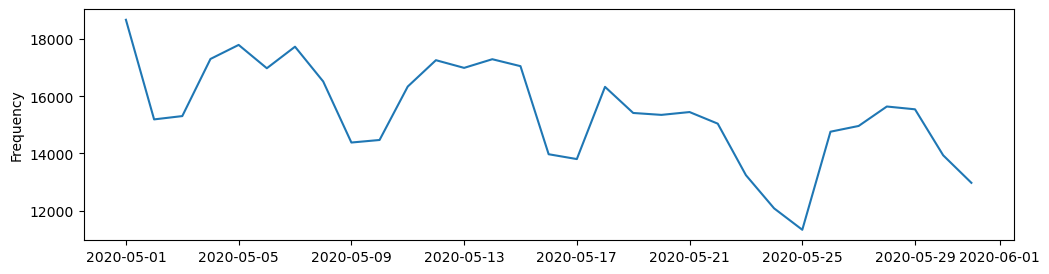

In [123]:
plt.figure(figsize=[12, 3])
plt.plot(tweets_over_time)
plt.ylabel('Frequency')
plt.show()

With `set_theme()` from Seaborn, you can set a visual style that will be used even if you do plain Matplotlib plotting. You can chose from five styles: 'darkgrid', 'whitegrid', 'dark', 'white', and 'ticks'.

In [124]:
import seaborn as sns

In [125]:
sns.set_theme(style='ticks')

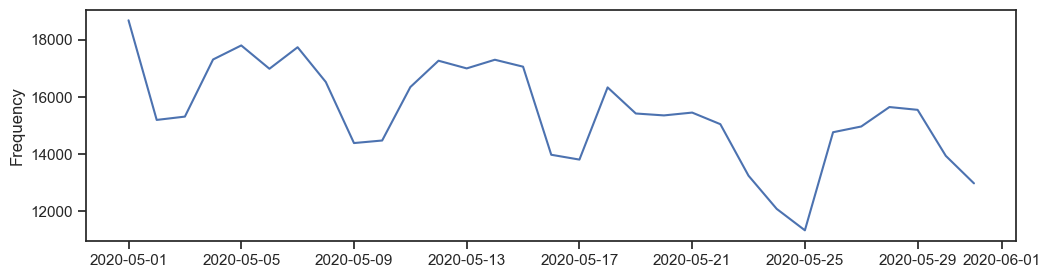

In [126]:
plt.figure(figsize=[12, 3])
plt.plot(tweets_over_time)
plt.ylabel('Frequency')
plt.show()

The TweetsCOV19 webpage shows [plots](https://data.gesis.org/tweetscov19/#Statistics) about the frequency development of selected hashtags up until April 2020. Above, we have collected the usage statistics for hashtags in `hashtag_list` and stored them in `days_hashtags_wide_array`. We can easily create figures for May 2020 from that 2-dimensional array. The following cell loops through the array by iterating through the `hashtag_indices` defined in line 1. Note that we only provide the y values, so Matplotlib uses a contiguous index from 0 to 30 on the x axis:

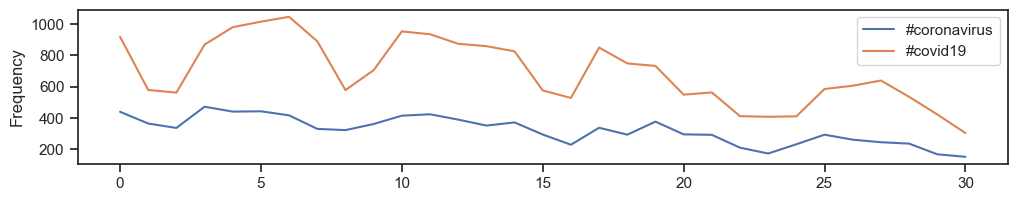

In [127]:
hashtag_indices = [0, 1]

plt.figure(figsize=[12, 2])
for hashtag_index in hashtag_indices:
    plt.plot(days_hashtags_wide_array[:, hashtag_index], label='#' + hashtag_list[hashtag_index])
plt.legend()
plt.ylabel('Frequency')
plt.show()

It is equally simple to plot data that lives in 3-dimensional arrays. The TweetsCOV19 webpage also shows time trends of the mean sentiment category scores of tweets in which prominent Twitter users are mentioned up until April 2020. We have retrieved the May 2020 data for mentions in `mention_list` and stored it in `days_mentions_sentiments_wide_array`. This time we do a first loop through all mentions from `mention_categories` (line 1) and a second loop through all sentiments from `sentiment_categories` (line 3). This time, we use datetime objects stored in `day_categories` as x values and draw the y values from the array:

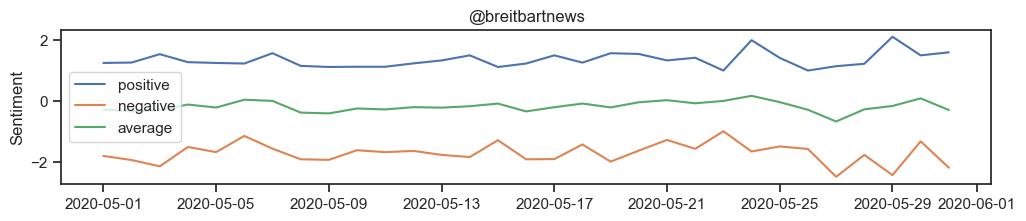

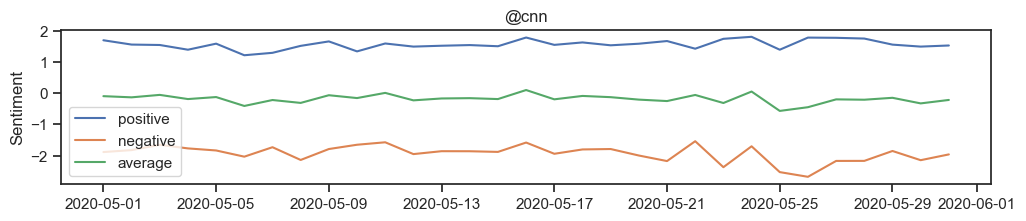

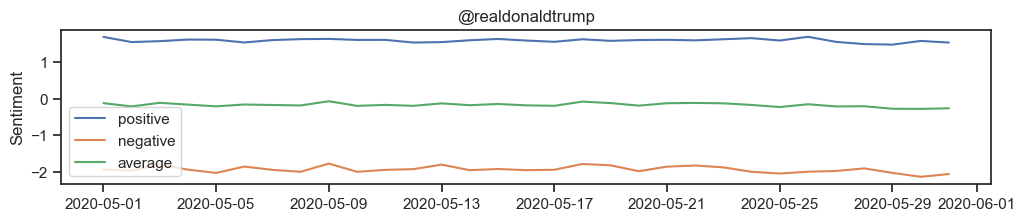

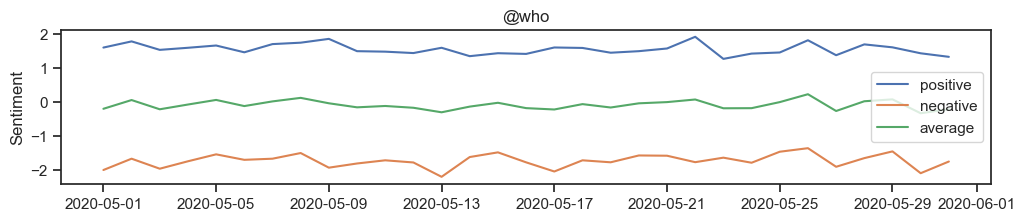

In [128]:
for mention_index in range(len(mention_categories)):
    plt.figure(figsize=[12, 2])
    for sentiment_index in range(len(sentiment_categories)):
        plt.plot(day_categories, days_mentions_sentiments_wide_array[:, mention_index, sentiment_index], label=sentiment_categories[sentiment_index])
    plt.legend()
    plt.title('@' + mention_categories[mention_index])
    plt.ylabel('Sentiment')
    plt.show()

Except for @who, the average sentiment is slightly negative. This means that the language of tweets that mention these users tends to be laden with negative emotions – it does not mean that negative sentiments are voiced about the mentioned users.

#### Distributions

Social media data is known to often be very skewed (*i.e.*, not normally distributed). Indeed, we have already seen that some users have tens of millions of followers. For quantitative analysis, especially for regression analyses (session 8), it is very important to know how variables are distributed. Boxplots can be a first step to assessing distributions. In the following, we are interested in the distributions of the 'followers_max' and 'friends_max' variables in the `users` table. To produce Seaborn boxplots, `melt()` the subtable with those two columns, ...

In [129]:
followers_friends = pd.melt(users[['followers_max', 'friends_max']])
followers_friends.head()

,variable,value
0,followers_max,21985195
1,followers_max,48295579
2,followers_max,4149063
3,followers_max,3788655
4,followers_max,6145493


then plot:

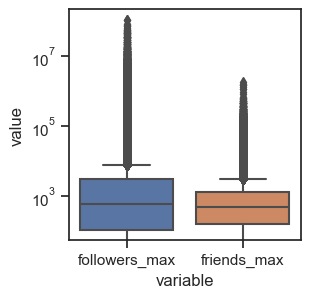

In [130]:
plt.figure(figsize=[3, 3])
sns.boxplot(x='variable', y='value', data=followers_friends)
plt.yscale('log')

Both variables are extremely skewed (note the logarithmic y axis). Often such variables are transformed into their logarithm to make them behave better:

In [131]:
log_users = users[['followers_max', 'friends_max']].copy()
log_users = np.log10(log_users[['followers_max', 'friends_max']].replace(to_replace=0, value=np.nan)).round(4)
log_users.columns = ['log_followers_max', 'log_friends_max']
log_users.head()

,log_followers_max,log_friends_max
0,7.3421,3.0477
1,7.6839,3.0449
2,6.6180,NaN
3,6.5785,2.4249
4,6.7886,1.4472


Seaborn's `histplot()` creates histograms and allows to add [kernel density estimates](https://en.wikipedia.org/wiki/Kernel_density_estimation). In line 3, we take a random sample from the data because density estimation takes quite long:

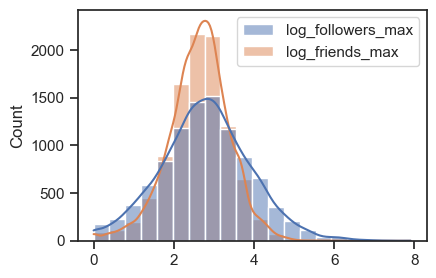

In [132]:
plt.figure(figsize=[4.5, 3])
sns.histplot(
    data=log_users.sample(n=10000, random_state=42), 
    bins=20, 
    kde=True
)
plt.show()

Both logged variables look normally distributed. That means it is a good hypothesis that the untransformed variables are [lognormally](https://en.wikipedia.org/wiki/Log-normal_distribution) distributed. We can test this hypothesis with the `powerlaw` library. First, we fit a number of candidate functions to the whole range (`xmin=1`) of the data using [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation):

In [133]:
import powerlaw
powerlaw.__version__

'1.5'

In [134]:
fit_followers_max = powerlaw.Fit(data=users['followers_max'], xmin=1)
fit_friends_max = powerlaw.Fit(data=users['friends_max'], xmin=1)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


We plot two of these candidate functions, the lognormal and a power law:

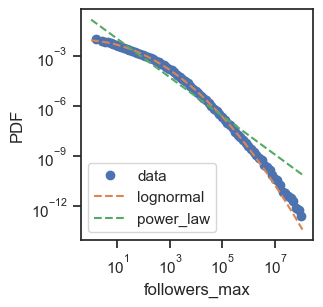

In [135]:
plt.figure(figsize=[3, 3])
fig = fit_followers_max.plot_pdf(marker='o', linestyle='', label='data')
fit_followers_max.lognormal.plot_pdf(linestyle='--', ax=fig, label='lognormal')
fit_followers_max.power_law.plot_pdf(linestyle='--', ax=fig, label='power_law')
plt.legend()
plt.xlabel('followers_max')
plt.ylabel('PDF')
plt.show()

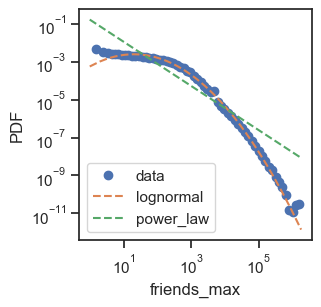

In [136]:
plt.figure(figsize=[3, 3])
fig = fit_friends_max.plot_pdf(marker='o', linestyle='', label='data')
fit_friends_max.lognormal.plot_pdf(linestyle='--', ax=fig, label='lognormal')
fit_friends_max.power_law.plot_pdf(linestyle='--', ax=fig, label='power_law')
plt.legend()
plt.xlabel('friends_max')
plt.ylabel('PDF')
plt.show()

The lognormal seems to be a better fit to the data in both cases. We can again test this using loglikelihood ratios. In both cases, but much more so in the `friends_max` case, the ratio (the first value in the brackets) is extremely large and significantly (the second value in the bracket) different from 0:

In [137]:
fit_followers_max.distribution_compare('lognormal', 'power_law')

(172104.98848532746, 0.0)

In [138]:
fit_friends_max.distribution_compare('lognormal', 'power_law')

(288739.09451601264, 0.0)

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

These results from fitting functions to the data mean that the latter is certainly not a **power law distribution**. However, we cannot be certain that the lognormal distribution is the best fit as we have not compared it against other candidate distributions. Knowing about power law behavior is important because, depending on their exponent, power laws do no have characteristic sample variance or even sample mean which is statistically problematic. To learn about the importance of power law distributions, consult Clauset *et al.* (2009).
</div>

#### Bivariate

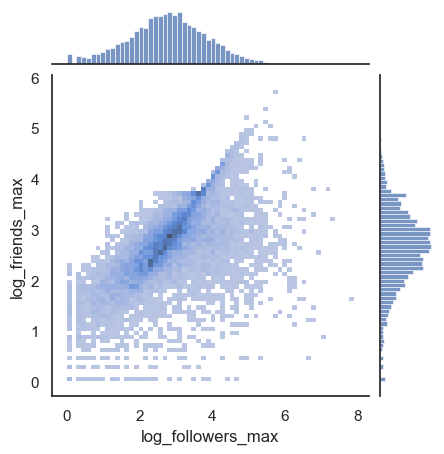

In [139]:
with sns.axes_style('white'):
    plot = sns.jointplot(
        data = log_users.sample(n=10000, random_state=42), 
        x = 'log_followers_max', 
        y = 'log_friends_max', 
        kind = 'hist', 
        #joint_kws = dict(bins=40), 
        #marginal_kws = dict(bins=20)
    )
    plot.fig.set_figwidth(4.5)
    plot.fig.set_figheight(4.5)

In [140]:
log_tweets = tweets[['followers', 'friends', 'retweets', 'favorites']].copy()
log_tweets = np.log10(log_tweets[['followers', 'friends', 'retweets', 'favorites']].replace(to_replace=0, value=np.nan))
log_tweets.columns = ['log_followers', 'log_friends', 'log_retweets', 'log_favorites']
#log_tweets.dropna(inplace=True)

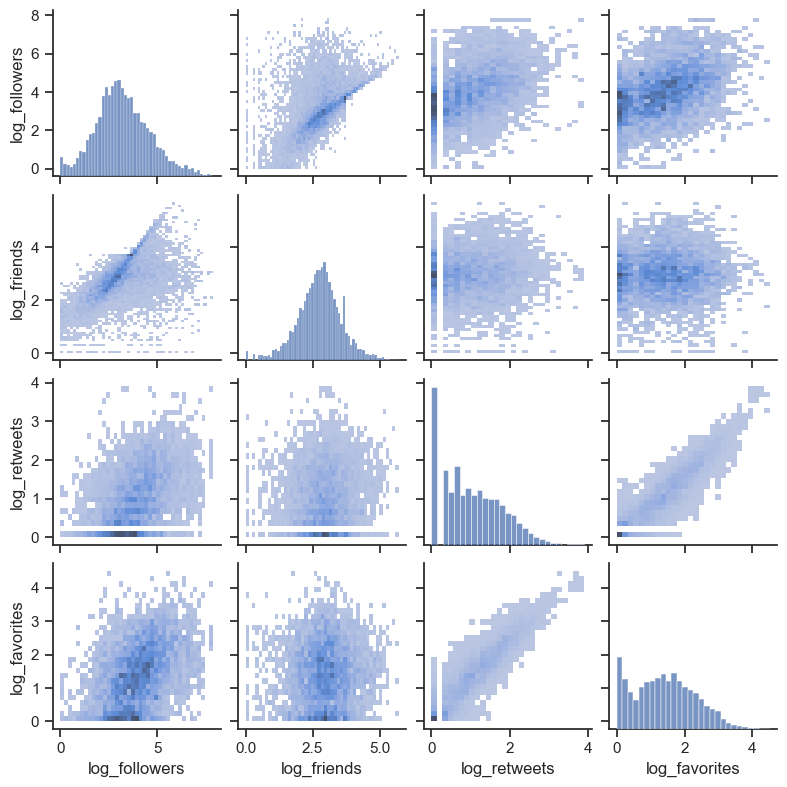

In [141]:
# HOW CHANGE THE NUMBER OF BINS OFF THE DIAGONAL?

sns.pairplot(
    data = log_tweets.sample(n=10000, random_state=42), 
    height = 2, 
    kind = 'hist', 
    diag_kind = 'hist', 
    #pair_kws = dict(bins=40), 
    #diag_kws = dict(bins=20)
)
plt.show()

## References

Batagelj, V. & Cerinsěk, M. (2013). On bibliographic networks. *Scientometrics* 96:845–864. https://doi.org/10.1007/s11192-012-0940-1.

Clauset, A., Shalizi, C. R., & Newman, M. E. J. (2009). "Power-law distributions in empirical data". *SIAM Review* 51:661–703. https://doi.org/10.1137/070710111.

Dimitrov, D., Baran, E., Fafalios, P., Yu, R., Zhu, X., Zloch, M., & Dietze, S. (2020). TweetsCOV19 - A Knowledge Base of Semantically Annotated Tweets about the COVID-19 Pandemic. In: *CIKM '20: Proceedings of the 29th ACM International Conference on Information & Knowledge Management* (p. 2991–2998). https://doi.org/10.1145/3340531.3412765.

Fafalios, P., Iosifidis, V., Ntoutsi, E., & Dietze, S. (2018). TweetsKB: A Public and Large-Scale RDF Corpus of Annotated Tweets. In: *The Semantic Web. ESWC 2018. Lecture Notes in Computer Science*, vol 10843. Springer, Cham. https://doi.org/10.1007/978-3-319-93417-4_12.

<a href='#weidmann_2022'>Weidmann, N. B. (2022)</a><a id='#weidmann_2022'></a>. *Data Management for Social Scientists: From Files to Databases*. Cambridge University Press.

Wikipedia (2022). Twitter. https://en.wikipedia.org/wiki/Twitter. Retrieved 01.12.2022.

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz

Contributors: Pouria Mirelmi & N. Gizem Bacaksizlar Turbic

Acknowledgements: ...

Version date: 6. January 2023

License: ...
</div>

#### Notes to be removed before publication

Reviewers: Olya & Helena

Review intro after sentiment and tld changes

Update figure 3 with sentiment tables

Review and finish green boxes

Use 'facts'